In [34]:
# By Ismail BOUZKKA

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from math import sqrt # Square root
from math import ceil # Ceil integer operator
from math import log # Logarithm function
import random 

# NumPy - Matrix and vector structures
import numpy as np # NumPy library
from numpy.random import multivariate_normal, randn, uniform # Probability distributions

# SciPy - Efficient mathematical calculation
from scipy.linalg import norm, qr, inv # Euclidean norm, QR decomposition from linear algebra
from scipy.linalg.special_matrices import toeplitz # Toeplitz matrices
from scipy.linalg import svdvals # Singular value decomposition

# <span style="color:rgb(234,81,96)"> 1- Second-order optimization methods</span>

### 1.1- Newton’s method

###### Implementation 1.1

In [3]:
def Newton(w0, f, grad_f, hess_f, n_iter=1, verbose=False):
    """
    Inputs:
        w0 : Initial vector.
        f  : Objective function.
        grad_f : Gradient of the objective function.
        hess_f : Hessian matrix of the objective function.
        n_iter : Number of iterations.
        verbose: Boolean value indicating whether the outcome of every iteration should be displayed

    Outputs:
        w_output : Final iterate of the method.
        objvals  : History of function values (output as a Numpy array of length n_iter)
    """

    # Initializations
    
    objvals = []  # Objective history
    w = w0.copy()  # Initial value of current iterate
    k = 0  # Initialize iteration counter
    # Current objective
    obj = f(w)  
    objvals.append(obj)  
    
    # Plot the initial values if asked to
    if verbose:
        print("Newton Method:")
        print(' | '.join([name.center(8) for name in ["iter", "fval"]]))
        print(' | '.join([("%d" % k).rjust(8), ("%.2e" % obj).rjust(8)]))
    
    # Main loop
    while k < n_iter:
        
        # Check if Hessian is invertible
        try:
            hess_inv = np.linalg.inv(hess_f(w))
        except np.linalg.LinAlgError:
            print("Hessian matrix is not invertible.")
            break
            
        # Perform the update 
        w[:] = w - hess_inv @ grad_f(w)
        
        # Compute new objective value
        obj = f(w)
        objvals.append(obj)
        # Plot relevant information if asked to
        if verbose:
            print(' | '.join([("%d" % k).rjust(8), ("%.2e" % obj).rjust(8)]))
        # Increment iteration count
        k += 1
    
    # Outputs
    w_output = w.copy()
    return w_output, np.array(objvals)



######  Quadratic problem

In [4]:
def q(w):
    return 2 * (w[0] + w[1] + w[2] - 3)**2 + (w[0] - w[1])**2 + (w[1] - w[2])**2

def grad_q(w):
    grad = np.zeros_like(w)
    grad[0] = 4*(w[0] + w[1] + w[2] - 3) + 2*(w[0] - w[1])
    grad[1] = 4*(w[0] + w[1] + w[2] - 3) - 2*(w[0] - w[1]) + 2*(w[1] - w[2])
    grad[2] = 4*(w[0] + w[1] + w[2] - 3) - 2*(w[1] - w[2])
    return grad

def hess_q(w):
    hess = np.array([[6, 2, 4],
                     [2, 8, 2],
                     [4, 2, 6]])
    return hess




Let's write down the first iteration of Newton’s method for quadratic problem, and show that Newton’s method indeed converges in one iteration to the solution


Newton Method:
  iter   |   fval  
       0 | 0.00e+00
       0 | 0.00e+00
Optimal solution: [1. 1. 1.]
Objective value at optimal solution: 0.0


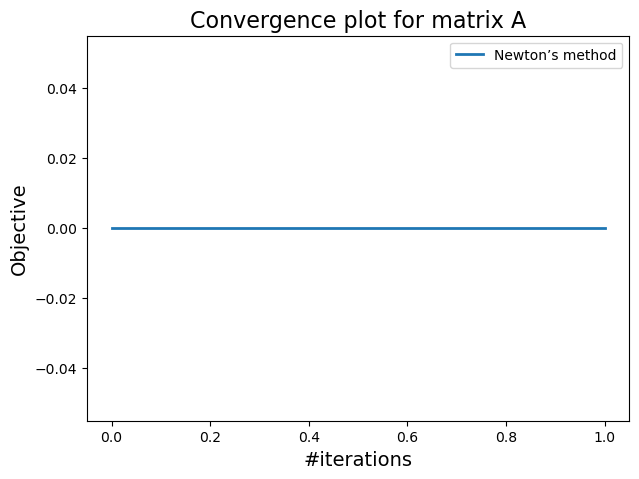

In [138]:
n_iter = 1 # One iteration
w0 = np.array([1.0, 1.0, 1.0])  
result, objvals = Newton(w0, q, grad_q, hess_q,n_iter = 1,verbose=True)

print("Optimal solution:", result)
print("Objective value at optimal solution:", q(result))

plt.figure(figsize=(7, 5))
plt.plot(objvals, label="Newton’s method", lw=2)
plt.title("Convergence plot for matrix A", fontsize=16)
plt.xlabel("#iterations", fontsize=14)
plt.ylabel("Objective", fontsize=14)
plt.legend()

Let's now Run the method starting from the origin and two other starting points

Optimal solution:for w= [0. 0. 0.]  :  [1. 1. 1.]
Objective value at optimal solution: 6.409494854920721e-31

Optimal solution for w1= [ 10. -20.  10.]  :  [1. 1. 1.]
Objective value at optimal solution: for w1= [ 10. -20.  10.]  :  5.048709793414476e-29

Optimal solution for w2= [-1000.   800.     0.]  :  [1. 1. 1.]
Objective value at optimal solution: for w2= [-1000.   800.     0.]  :  7.815881007129398e-26


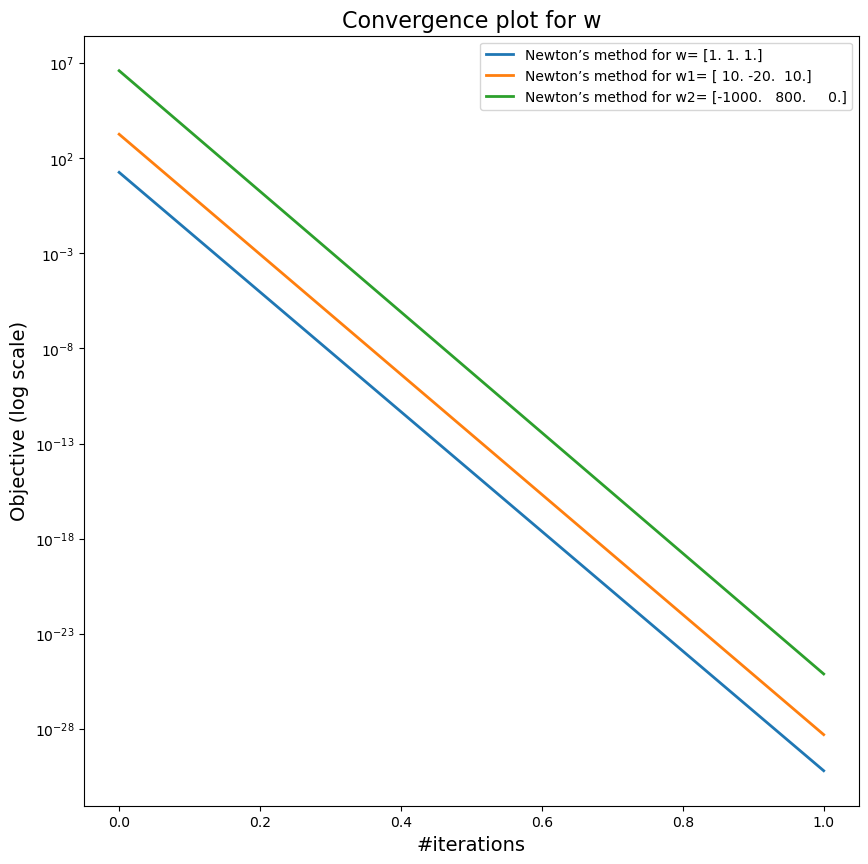

In [139]:
w = np.array([0.0, 0.0, 0.0])  
result, objvals = Newton(w, q, grad_q, hess_q,1,False)
print("Optimal solution:for w= %s  : "%str(w) , result)
print("Objective value at optimal solution:", q(result))

w1 = np.array([10., -20., 10.])
result1, objvals1 = Newton(w1, q, grad_q, hess_q,1,False)
print("\nOptimal solution for w1= %s  : "%str(w1) , result1)
print("Objective value at optimal solution: for w1= %s  : "%str(w1), q(result1))

w2 = np.array([-1000., 800., 0.])
result2, objvals2 = Newton(w2, q, grad_q, hess_q,1,False)
print("\nOptimal solution for w2= %s  : "%str(w2) , result)
print("Objective value at optimal solution: for w2= %s  : "%str(w2), q(result2))


plt.figure(figsize=(10, 10))
plt.semilogy(objvals, label="Newton’s method for w= %s"%str(w0), lw=2)
plt.semilogy(objvals1, label="Newton’s method for w1= %s"%str(w1), lw=2)
plt.semilogy(objvals2, label="Newton’s method for w2= %s"%str(w2), lw=2)

plt.title("Convergence plot for w", fontsize=16)
plt.xlabel("#iterations", fontsize=14)
plt.ylabel("Objective (log scale)", fontsize=14)
plt.legend()


plt.legend()

#####  => We can indeed observe convergence in one iteration

######  Rosenbrock function 

In [5]:
# Rosenbrock function

def rosenbrock(w):
    return 100 * (w[1] - w[0]**2)**2 + (1 - w[0])**2

def grad_rosenbrock(w):
    grad = np.zeros_like(w)
    grad[0] = -400 * w[0] * (w[1] - w[0]**2) - 2 * (1 - w[0])
    grad[1] = 200 * (w[1] - w[0]**2)
    return grad

def hess_rosenbrock(w):
    hess = np.array([[1200 * w[0]**2 - 400 * w[1] + 2, -400 * w[0]],
                     [-400 * w[0], 200]])
    return hess


Let's now Apply the implementation of Newton’s method to the Rosenbrock problem

Optimal solution for w01: [1. 1.]
Objective value at optimal solution for w01: 0.0


Hessian matrix is not invertible.
Optimal solution for w02: [-4.99999607e+09  2.49999607e+19]
Objective value at optimal solution for w02: 2.4999960683547218e+19


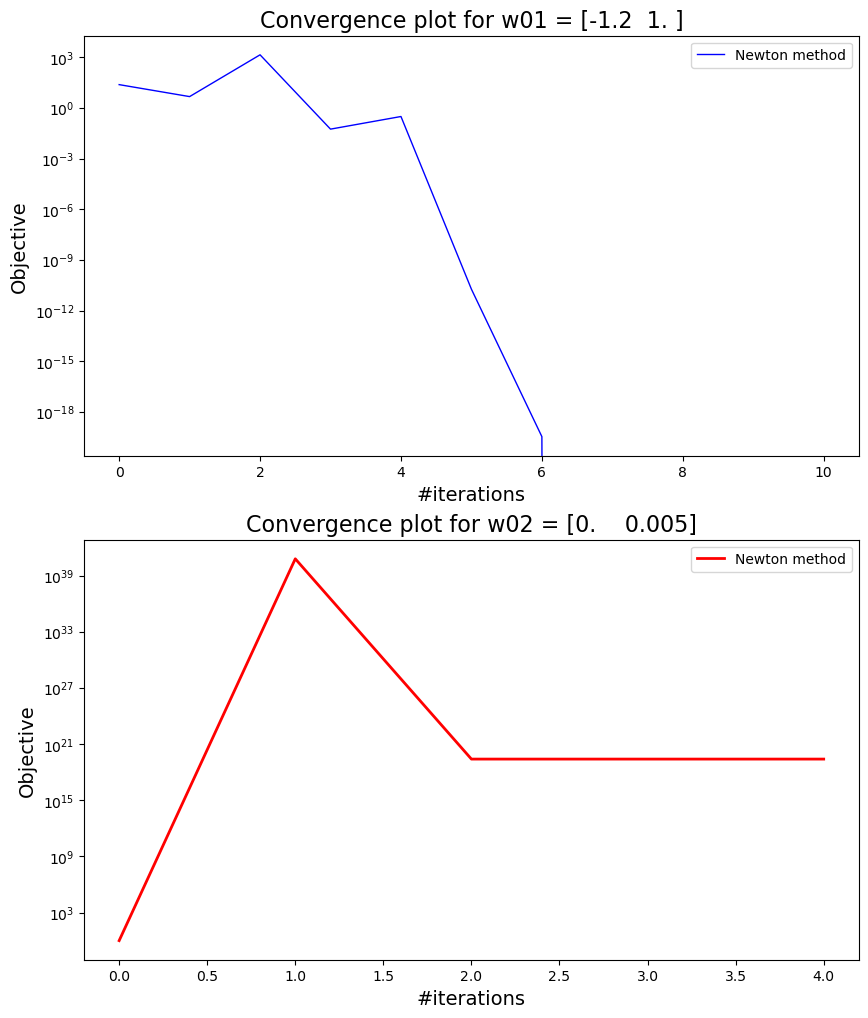

In [141]:
w01 = np.array([-1.2, 1.])
w02 = np.array([0., 1/200. + 1e-12])

result1, objvals1 = Newton(w01, rosenbrock, grad_rosenbrock, hess_rosenbrock, n_iter=10,verbose=False)
print("Optimal solution for w01:", result1)
print("Objective value at optimal solution for w01:", rosenbrock(result1))

print('\n')
result2, objvals2 = Newton(w02, rosenbrock, grad_rosenbrock, hess_rosenbrock,n_iter=10, verbose=False)
print("Optimal solution for w02:", result2)
print("Objective value at optimal solution for w02:", rosenbrock(result2))


plt.figure(figsize=(10, 12))
plt.subplot(211)
plt.semilogy(objvals1, label="Newton method",color = "blue" ,lw=1)
plt.title("Convergence plot for w01 = %s"%str(w01), fontsize=16)
plt.xlabel("#iterations", fontsize=14)
plt.ylabel("Objective", fontsize=14)
plt.legend()

plt.subplot(212)
plt.semilogy(objvals2, label="Newton method",color = "red" ,lw=2)
plt.title("Convergence plot for w02 = %s"%str(w02), fontsize=16)
plt.xlabel("#iterations", fontsize=14)
plt.ylabel("Objective", fontsize=14)
plt.legend()


###### We can see that the method converges for w01 but does not converge for w02 because its hessian is not invertible





Running the method starting from the point w03

In [142]:
w03 = np.array([0, 0.005])
result1, objvals1 = Newton(w03, rosenbrock, grad_rosenbrock, hess_rosenbrock, n_iter=1,verbose=True)

Newton Method:
  iter   |   fval  
       0 | 1.00e+00
Hessian matrix is not invertible.


#####   we cannot run the method starting from the point w03 because it's hessian is not invertible
##### This illustrates  how sensitive Newton's method can be to the choice of the initial point.While some starting points lead to rapid convergence ( convergence in one iteration ), others can lead to failure due to issues like a non-invertible Hessian. 
##### This shows that the Newton's method uses local information (gradients and Hessians) and does not guarantee global convergence.

### 1.2- A globally convergent version of Newton’s method

In [6]:
#Implementation 1.2


def global_Newton(w0, f, grad_f, hess_f, n_iter=1,theta=0.5,c=1e-4,verbose=False):
    """
    Inputs:
        w0 : Initial vector.
        f  : Objective function.
        grad_f : Gradient of the objective function.
        hess_f : Hessian matrix of the objective function.
        n_iter : Number of iterations.
        theta : Parameter for Armijo condition.
        c : Parameter for Armijo condition.
        verbose: Boolean value indicating whether the outcome of every iteration should be displayed

    Outputs:
        w_output : Final iterate of the method.
        objvals  : History of function values (output as a Numpy array of length n_iter)
    """

    # Initializations
    
    objvals = []  # Objective history
    w = w0.copy()  # Initial value of current iterate
    k = 0  # Initialize iteration counter
    # Current objective
    obj = f(w)  
    objvals.append(obj)  
    
    # Plot the initial values if asked to
    if verbose:
        print("Global Newton Method:")
        print(' | '.join([name.center(8) for name in ["iter", "fval"]]))
        print(' | '.join([("%d" % k).rjust(8), ("%.2e" % obj).rjust(8)]))
    
    # Main loop
    while k < n_iter:
        
        # Check if Hessian is invertible
        try:

            eigval_min  =np.linalg.eigvalsh(hess_f(w)).min()
            lamda = 2*max(-eigval_min,1e-10)
            d = - np.linalg.inv(hess_f(w) + lamda*np.identity(len(w))) @ grad_f(w)
            
        except np.linalg.LinAlgError:
            print("Hessian matrix is not invertible.")
            break
        
        #Armijo line search
        alpha = 1 # intial step size
        while f(w+ alpha*d)> f(w) + c*alpha*(d.T @ grad_f(w)) :
            alpha*=theta
                        

        # Perform the update 
        w[:] = w + alpha*d 
        
        # Compute new objective value
        obj = f(w)
        objvals.append(obj)
        # Plot relevant information if asked to
        if verbose:
            print(' | '.join([("%d" % k).rjust(8), ("%.2e" % obj).rjust(8)]))
        # Increment iteration count
        k += 1
    
    # Output
    w_output = w.copy()
    return w_output, np.array(objvals)



##### Let's Apply Newton’s method with line search to the problem (4) using c = 0.0001, θ = 0.5, and the two initial points mentioned in Question 2 and compare the results with those obtained for the basic Newton iteration.


In [144]:
w01 = np.array([-1.2, 1.])

result, objvals = global_Newton(w01, rosenbrock, grad_rosenbrock, hess_rosenbrock, n_iter=25,theta=0.5,c=0.0001,verbose=True)
print("Optimal solution:", result)
print("Objective value at optimal solution:", rosenbrock(result))


Global Newton Method:
  iter   |   fval  
       0 | 2.42e+01
       0 | 4.73e+00
       1 | 4.09e+00
       2 | 3.23e+00
       3 | 3.21e+00
       4 | 1.94e+00
       5 | 1.60e+00
       6 | 1.18e+00
       7 | 9.22e-01
       8 | 5.97e-01
       9 | 4.53e-01
      10 | 2.81e-01
      11 | 2.11e-01
      12 | 8.90e-02
      13 | 5.15e-02
      14 | 2.00e-02
      15 | 7.17e-03
      16 | 1.07e-03
      17 | 7.78e-05
      18 | 2.82e-07
      19 | 8.52e-12
      20 | 3.74e-21
      21 | 0.00e+00
      22 | 0.00e+00
      23 | 0.00e+00
      24 | 0.00e+00
Optimal solution: [1. 1.]
Objective value at optimal solution: 0.0


w01 = [-1.2, 1.] converges to the optimal value after 22 iteration

In [145]:
w02 = np.array([0., 1/200. + 1e-12])
result, objvals = global_Newton(w02, rosenbrock, grad_rosenbrock, hess_rosenbrock, n_iter=20,theta=0.5,c=0.0001,verbose=True)
print("Optimal solution for w02:", result)
print("Objective value at optimal solution for w02:", rosenbrock(result))

Global Newton Method:
  iter   |   fval  
       0 | 1.00e+00
       0 | 7.56e-01
       1 | 5.92e-01
       2 | 3.41e-01
       3 | 2.45e-01
       4 | 1.33e-01
       5 | 1.10e-01
       6 | 2.74e-02
       7 | 1.20e-02
       8 | 2.91e-03
       9 | 3.63e-04
      10 | 1.03e-05
      11 | 1.25e-08
      12 | 1.98e-14
      13 | 5.06e-26
      14 | 0.00e+00
      15 | 0.00e+00
      16 | 0.00e+00
      17 | 0.00e+00
      18 | 0.00e+00
      19 | 0.00e+00
Optimal solution for w02: [1. 1.]
Objective value at optimal solution for w02: 0.0


w02 = [0., 1/200. + 1e-12] converge to the optimal value after 15 iterations

Hessian matrix is not invertible.


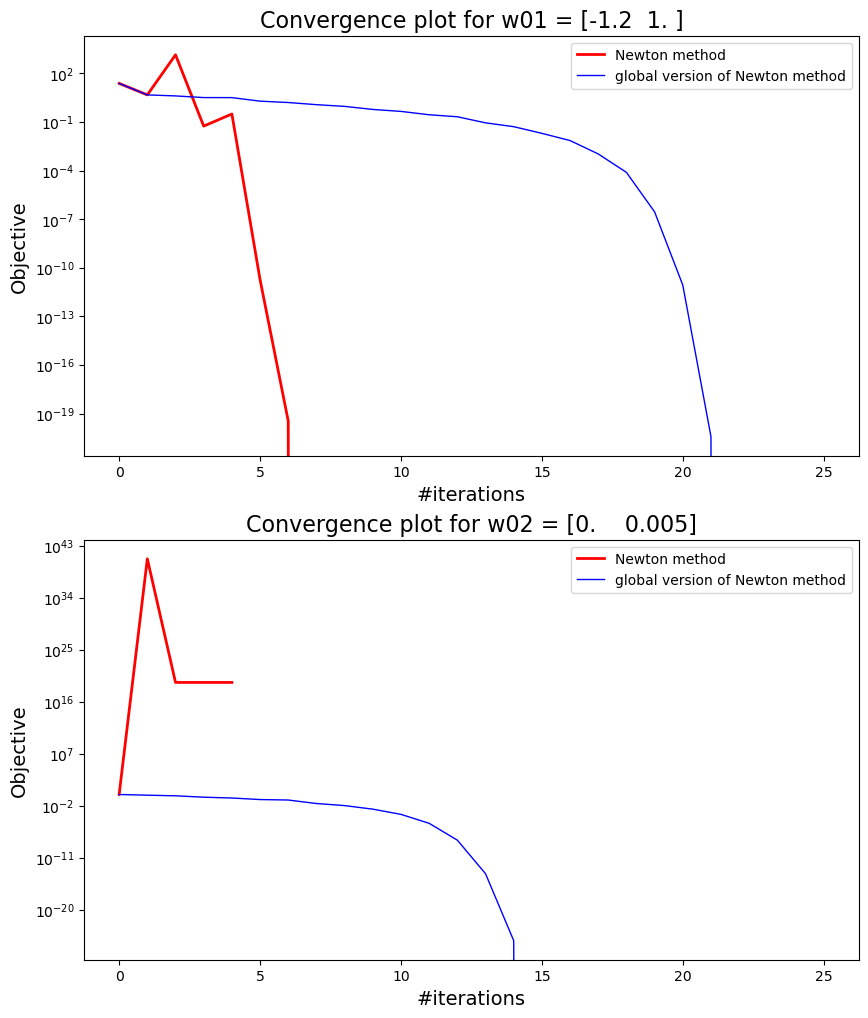

In [149]:
w01 = np.array([-1.2, 1.])
result, objvals = Newton(w01, rosenbrock, grad_rosenbrock, hess_rosenbrock,n_iter=25, verbose=False)
resultGlobal, objvalsG = global_Newton(w01, rosenbrock, grad_rosenbrock, hess_rosenbrock, n_iter=25,theta=0.5,c=0.0001,verbose=False)

w02 = np.array([0., 1/200 + 1e-12])
result2, objvals2 = Newton(w02, rosenbrock, grad_rosenbrock, hess_rosenbrock,n_iter=25, verbose=False)
resultGlobal, objvalsG2 = global_Newton(w02, rosenbrock, grad_rosenbrock, hess_rosenbrock, n_iter=25,theta=0.5,c=0.0001,verbose=False)



plt.figure(figsize=(10, 12))
plt.subplot(211)
plt.semilogy(objvals, label="Newton method",color = "red" ,lw=2)
plt.semilogy(objvalsG, label="global version of Newton method",color = "blue" ,lw=1)
plt.title("Convergence plot for w01 = %s"%str(w01), fontsize=16)
plt.xlabel("#iterations", fontsize=14)
plt.ylabel("Objective", fontsize=14)
plt.legend()

plt.subplot(212)
plt.semilogy(objvals2, label="Newton method",color = "red" ,lw=2)
plt.semilogy(objvalsG2, label="global version of Newton method",color = "blue" ,lw=1)
plt.title("Convergence plot for w02 = %s"%str(w02), fontsize=16)
plt.xlabel("#iterations", fontsize=14)
plt.ylabel("Objective", fontsize=14)
plt.legend()


The globally convergent version of Newton’s method handles the cases where the Hessian matrix was not be invertible for the classic Newton method. 
It does not depend on the starting point


##### Trying out a few values for c and θ 


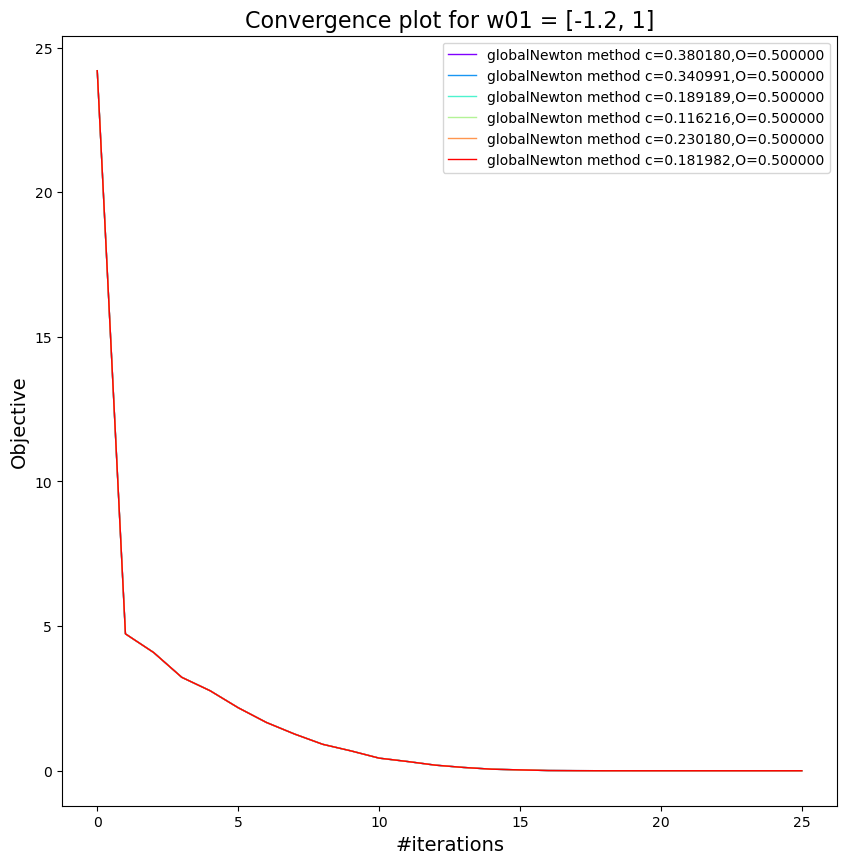

In [150]:
# Here we fix θ and take multiple values of c

random.seed(0)
theta= [0.5 for i in range(6) ] 
c=  random.choices(np.linspace(0,0.45,1000),k=6)
w01 = np.array([-1.2, 1])


plt.figure(figsize=(10, 10))
color = iter(plt.cm.rainbow(np.linspace(0, 1, len(c))))
for i in range(len(c)):
    resultGlobal, objvalsG = global_Newton(w01, rosenbrock, grad_rosenbrock, hess_rosenbrock, n_iter=25,theta=theta[i],c=c[i],verbose=False)
    col = next(color)
    plt.plot(objvalsG, label="globalNewton method c=%f,O=%f"%(c[i],theta[i]),color = col ,lw=1)


plt.title("Convergence plot for w01 = [-1.2, 1]", fontsize=16)
plt.xlabel("#iterations", fontsize=14)
plt.ylabel("Objective", fontsize=14)
plt.legend()


##### Here we can see that changing the parameter c does not have a reel impact on the method (and it's convergence)

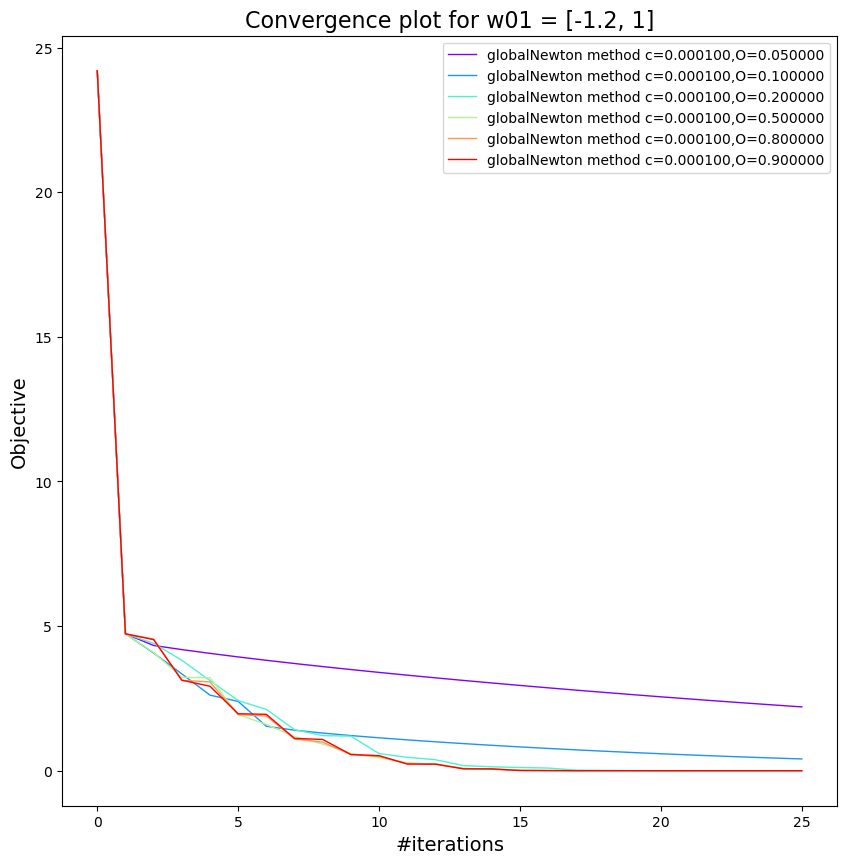

In [151]:
# Here we fix c and take multiple values of θ

theta= [0.05,0.1,0.2,0.5,0.8,0.9]
c=  [1e-4 for i in range(6) ] 
w01 = np.array([-1.2, 1])


plt.figure(figsize=(10, 10))
color = iter(plt.cm.rainbow(np.linspace(0, 1, len(c))))
for i in range(len(c)):
    resultGlobal, objvalsG = global_Newton(w01, rosenbrock, grad_rosenbrock, hess_rosenbrock, n_iter=25,theta=theta[i],c=c[i],verbose=False)
    col = next(color)
    plt.plot(objvalsG, label="globalNewton method c=%f,O=%f"%(c[i],theta[i]),color = col ,lw=1)



plt.title("Convergence plot for w01 = [-1.2, 1]", fontsize=16)
plt.xlabel("#iterations", fontsize=14)
plt.ylabel("Objective", fontsize=14)
plt.legend()


##### Here we can see that changing the parameter θ has a reel impact on the convergence. In this example, higher θ leads to rapid convergence

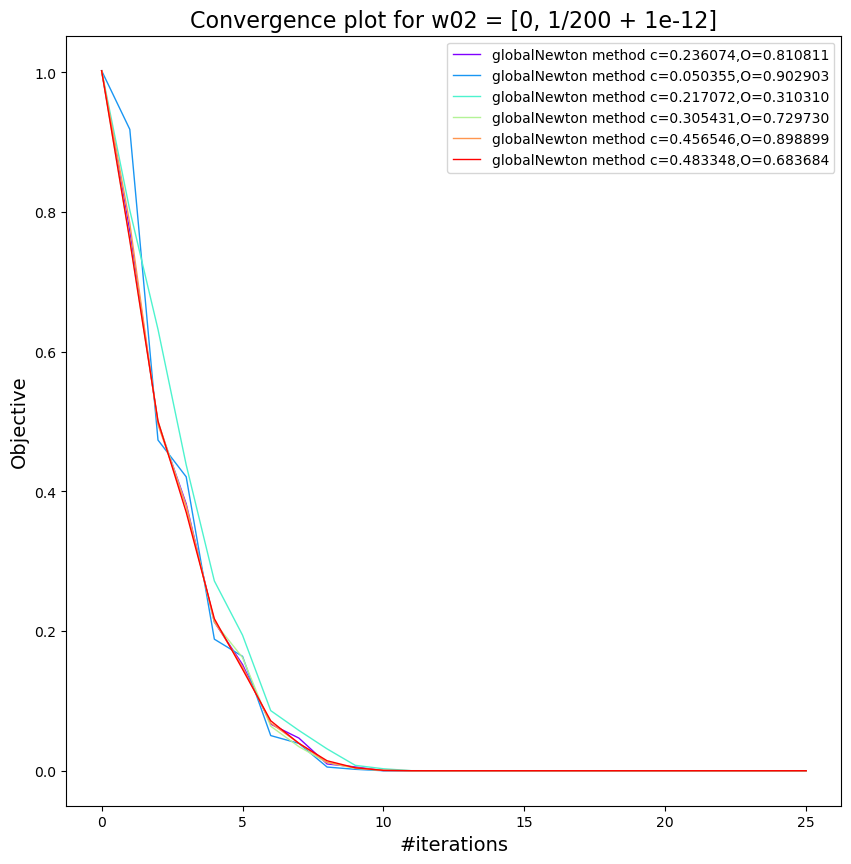

In [153]:
# We Try out a few values for both c and θ 

w02 = np.array([0., 1/200 + 1e-12])
theta=  random.choices(np.linspace(0,1,1000),k=6) 
c=  random.choices(np.linspace(0,0.5,10000),k=6,)
w01 = np.array([-1.2, 1])


plt.figure(figsize=(10, 10))
color = iter(plt.cm.rainbow(np.linspace(0, 1, len(c))))
for i in range(len(c)):
    resultGlobal, objvalsG = global_Newton(w02, rosenbrock, grad_rosenbrock, hess_rosenbrock, n_iter=25,theta=theta[i],c=c[i],verbose=False)
    col = next(color)
    plt.plot(objvalsG, label="globalNewton method c=%f,O=%f"%(c[i],theta[i]),color = col ,lw=1)



plt.title("Convergence plot for w02 = [0, 1/200 + 1e-12]", fontsize=16)
plt.xlabel("#iterations", fontsize=14)
plt.ylabel("Objective", fontsize=14)
plt.legend()


#####   c does not have a huge impact on the evolution while  θ affects the convergence
####    => A fine Tuning of  θ can accelerate the convergence for the global newton


### 1.3  Quasi-Newton methods and BFGS

In [10]:
#Implementation-1.3 of quasi-Newton method with the BFGS update  and Armijo line search 


def Quasi_Newton_BFGS(w0, f, grad_f, n_iter=1,theta=0.5,c=0.1,verbose=False):
    """

    Inputs:
        w0 : Initial vector.
        f  : Objective function.
        grad_f : Gradient of the objective function.
        n_iter : Number of iterations.
        theta : Parameter for Armijo condition.
        c : Parameter for Armijo condition.
        verbose: Boolean value indicating whether the outcome of every iteration should be displayed

    Outputs:
        w_output : Final iterate of the method.
        objvals  : History of function values (output as a Numpy array of length n_iter+1)
    """

    # Initializations
    
    objvals = []  # Objective history
    w = w0.copy()  # Initial value of current iterate
    H = np.identity(len(w)) 
    k = 0  # Initialize iteration counter
    
    # Current objective
    obj = f(w)  
    objvals.append(obj)  
    
    
    # Plot the initial values if asked to
    if verbose:
        print("Quasi-Newton methods and BFGS:")
        print(' | '.join([name.center(8) for name in ["iter", "fval"]]))
        print(' | '.join([("%d" % k).rjust(8), ("%.2e" % obj).rjust(8)]))
    
    # Main loop
    while k < n_iter:
        
        d = -np.dot(H, grad_f(w))
        #Armijo line search
        alpha = 1 # intial step size
        while  f(w+ alpha*d)> f(w) + c*alpha*(d@grad_f(w)) :
            alpha*=theta       
      
    
        # Perform the update 
        w_k1 = w + alpha*d 
        s =  w_k1 -w
        v = grad_f(w_k1) - grad_f(w)
        r =s.T@ v
        if(r>0):
            a_ = np.identity(len(w)) - np.outer(v,s)/r
            b_ = np.outer(s,s)/r
            H = a_.T @ H @ a_ + b_
        # Compute new objective value
        obj = f(w_k1)
        objvals.append(obj)
        # Plot relevant information if asked to
        if verbose:
            print(' | '.join([("%d" % k).rjust(8), ("%.2e" % obj).rjust(8)]))
        # Increment iteration count
        
        w = w_k1.copy()
        k += 1
    
    # Output
    w_output = w.copy()
    return w_output, np.array(objvals)



##### Comparison of  the quasi-Newton method  on  (Quadratic problem 3) and (Rosenbrock function  4)


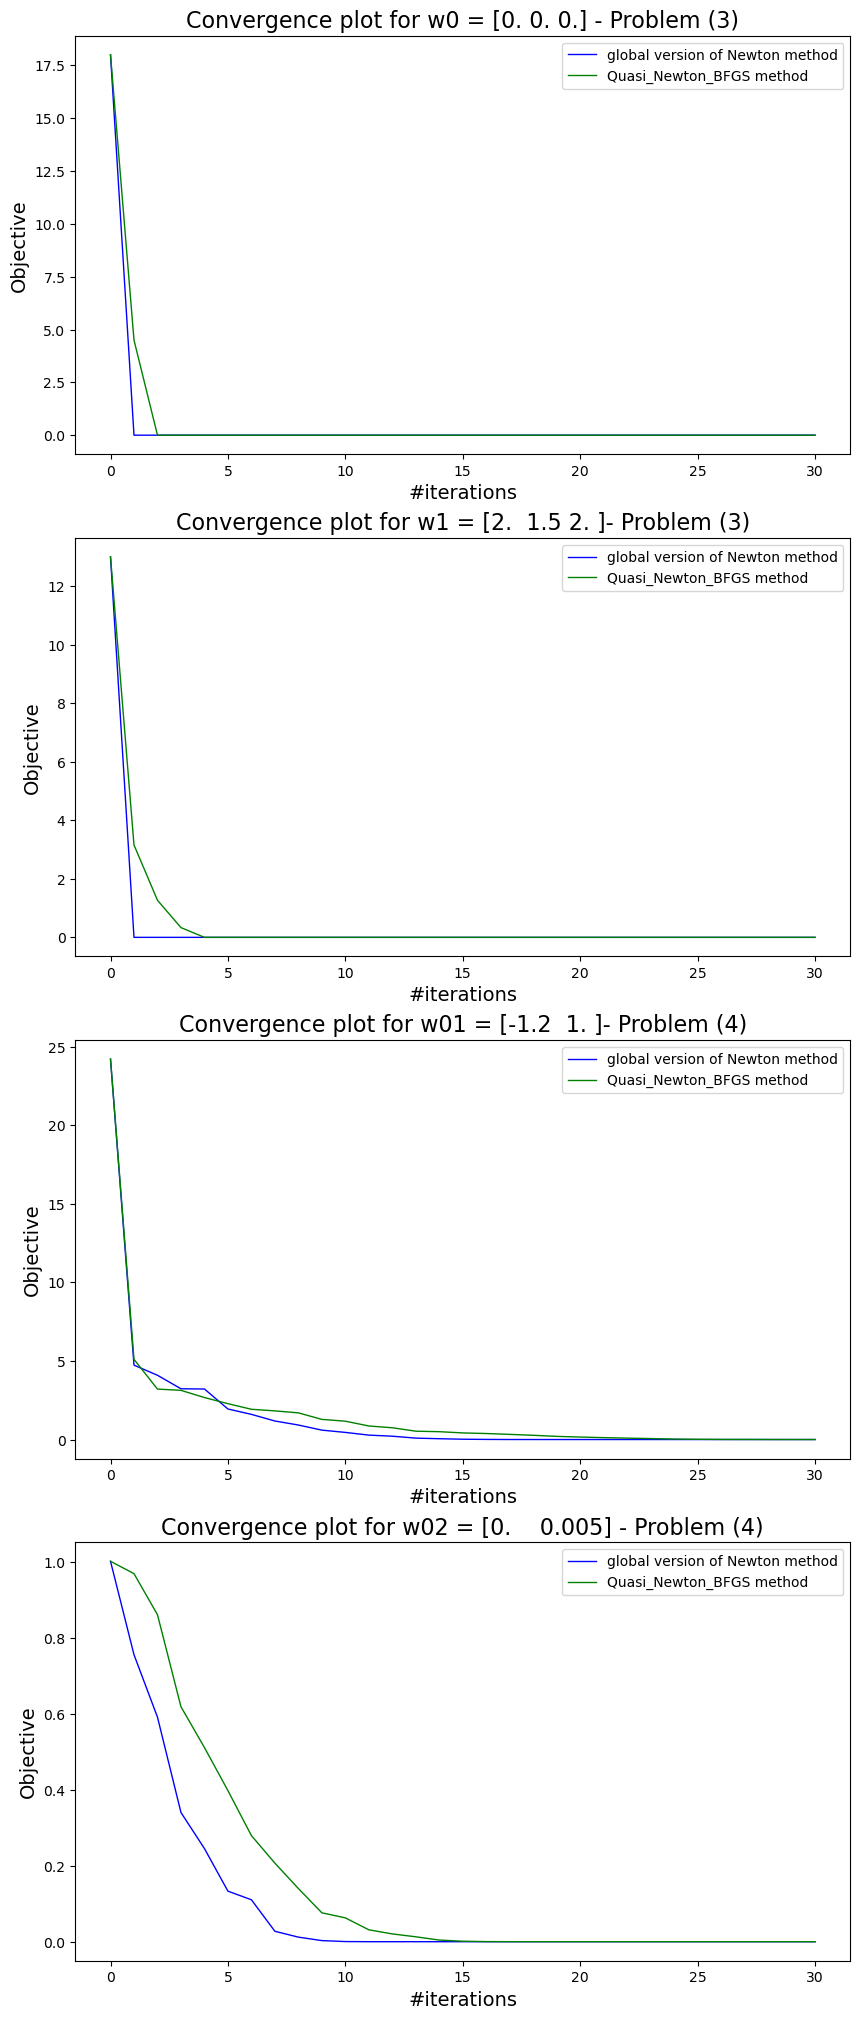

In [155]:
# Comparison  on  problem (3) 
n_iter = 30

w0 = np.array([0., 0., 0.])
resultGlobal, objvalsG = global_Newton(w0, q, grad_q, hess_q, n_iter=n_iter,theta=0.5,c=0.0001,verbose=False)
resultBFGS, objvalsBFGS = Quasi_Newton_BFGS(w0, q, grad_q, n_iter=n_iter,theta=0.5,c=0.0001,verbose=False)

plt.figure(figsize=(10, 25))
plt.subplot(411)
plt.plot(objvalsG, label="global version of Newton method",color = "blue" ,lw=1)
plt.plot(objvalsBFGS, label="Quasi_Newton_BFGS method",color = "green" ,lw=1)
plt.title("Convergence plot for w0 = %s - Problem (3)"%str(w0), fontsize=16)
plt.xlabel("#iterations", fontsize=14)
plt.ylabel("Objective", fontsize=14)
plt.legend()


w1 = np.array([2., 1.5, 2.])
resultGlobal, objvalsG = global_Newton(w1, q, grad_q, hess_q, n_iter=n_iter,theta=0.5,c=0.0001,verbose=False)
resultBFGS, objvalsBFGS = Quasi_Newton_BFGS(w1, q, grad_q, n_iter=n_iter,theta=0.5,c=0.0001,verbose=False)


plt.subplot(412)
plt.plot(objvalsG, label="global version of Newton method",color = "blue" ,lw=1)
plt.plot(objvalsBFGS, label="Quasi_Newton_BFGS method",color = "green" ,lw=1)
plt.title("Convergence plot for w1 = %s- Problem (3)"%str(w1), fontsize=16)
plt.xlabel("#iterations", fontsize=14)
plt.ylabel("Objective", fontsize=14)
plt.legend()


w01 = np.array([-1.2, 1.])
resultGlobal, objvalsG = global_Newton(w01, rosenbrock, grad_rosenbrock, hess_rosenbrock, n_iter=n_iter,theta=0.5,c=0.0001,verbose=False)
resultBFGS, objvalsBFGS = Quasi_Newton_BFGS(w01, rosenbrock, grad_rosenbrock, n_iter=n_iter,theta=0.5,c=0.0001,verbose=False)
        

plt.subplot(413)
plt.plot(objvalsG, label="global version of Newton method",color = "blue" ,lw=1)
plt.plot(objvalsBFGS, label="Quasi_Newton_BFGS method",color = "green" ,lw=1)
plt.title("Convergence plot for w01 = %s- Problem (4)"%str(w01), fontsize=16)
plt.xlabel("#iterations", fontsize=14)
plt.ylabel("Objective", fontsize=14)
plt.legend()


w02 = np.array([0., 1/200 + 1e-12])
resultGlobal, objvalsG = global_Newton(w02, rosenbrock, grad_rosenbrock, hess_rosenbrock, n_iter=n_iter,theta=0.5,c=0.0001,verbose=False)
resultBFGS, objvalsBFGS = Quasi_Newton_BFGS(w02, rosenbrock, grad_rosenbrock, n_iter=n_iter,theta=0.5,c=0.0001,verbose=False)


plt.subplot(414)
plt.plot(objvalsG, label="global version of Newton method",color = "blue" ,lw=1)
plt.plot(objvalsBFGS, label="Quasi_Newton_BFGS method",color = "green" ,lw=1)
plt.title("Convergence plot for w02 = %s - Problem (4)"%str(w02), fontsize=16)
plt.xlabel("#iterations", fontsize=14)
plt.ylabel("Objective", fontsize=14)
plt.legend()




Here the global Newton method and the Quasi-Newton method are quite similar(with a bit advantage for the global newton).
However runing the global Newton method has more cost since it computes both the gradient and the inverse of the hessian while in the BFGS method
we compute only the gradient and an approximation matrix H which has a less computation complexity

### 1.4 Limited-memory BFGS

In [9]:
#Implementation 1.4 : Quasi-Newton method with the L-BFGS update



def Quasi_Newton_L_BFGS(w0, f, grad_f, m,n_iter=1,theta=0.5,c=0.0001,verbose=False):
    """

    Inputs:
        w0 : Initial vector.
        f  : Objective function.
        grad_f : Gradient of the objective function.
        m : number of previous iterations to remember
        n_iter : Number of iterations.
        theta : Parameter for Armijo condition.
        c : Parameter for Armijo condition.
        verbose: Boolean value indicating whether the outcome of every iteration should be displayed

    Outputs:
        w_output : Final iterate of the method.
        objvals  : History of function values (output as a Numpy array of length n_iter)
    """

    # Initializations
    objvals = []  # Objective history
    w = w0.copy()  # Initial value of current iterate
    H = np.identity(len(w)) 
    s_hist = [] # History of s vectors
    v_hist = [] # History of v vectors
    k = 0  # Initialize iteration counter
    
    
    # Current objective
    obj = f(w)  
    objvals.append(obj)  
    
    
    # Plot the initial values if asked to
    if verbose:
        print("Limited-Memory BFGS  Method:")
        print(' | '.join([name.center(8) for name in ["iter", "fval"]]))
        print(' | '.join([("%d" % k).rjust(8), ("%.2e" % obj).rjust(8)]))
    
    # Main loop
    while k < n_iter:
        
        d = -np.dot(H, grad_f(w))
        
        #Armijo line search
        alpha = 1.0 # intial step size
        armijo_iter = 0  # Iteration counter for Armijo line search
        while f(w+ alpha*d)> f(w) + c*alpha*(grad_f(w)@d) :
            alpha*=theta
            
        w_k1 = w + alpha*d 
        s =  w_k1 -w
        v = grad_f(w_k1) - grad_f(w)
        s_hist.append(s)
        v_hist.append(v)
        
        if len(s_hist) > m:
            s_hist.pop(0)
            v_hist.pop(0)
        
        Hk = np.identity(len(w))
 
        for i in range(len(s_hist)):
            r = s_hist[i].T@v_hist[i]
            if(r>0):
                a_ = np.identity(len(w)) - np.outer(v_hist[i],s_hist[i])/r
                b_ = np.outer(s_hist[i],s_hist[i])/r
                Hk = a_.T @ Hk @ a_ + b_
        
        # Compute new objective value
        obj = f(w_k1)
        objvals.append(obj)
        # Plot relevant information if asked to
        if verbose:
            print(' | '.join([("%d" % k).rjust(8), ("%.2e" % obj).rjust(8)]))
        
        w = w_k1.copy()
        H=Hk
        k += 1
        
    # Output
    w_output = w.copy()
    return w_output, np.array(objvals)



#####  Run BFGS and three variants of L-BFGS respectively using m = 0, m = 1 and m = 5 on the Rosenbrock function 

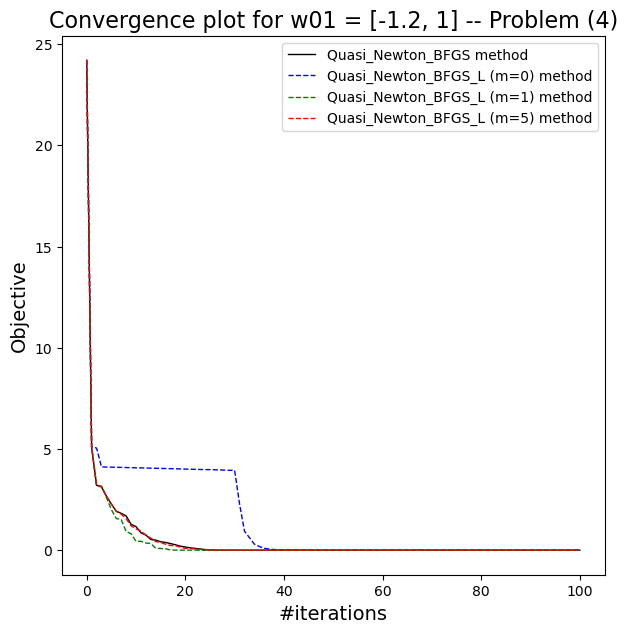

In [157]:
w01 =np.array([-1.2, 1.]) 
n_iter=100


resultBFGS, objvalsBFGS = Quasi_Newton_BFGS(w01, rosenbrock, grad_rosenbrock, n_iter=n_iter,theta=0.5,c=0.0001,verbose=False)
resultBFGSL, objvalsBFGSL = Quasi_Newton_L_BFGS(w01, rosenbrock, grad_rosenbrock,m=0 ,n_iter=n_iter,theta=0.5,c=0.0001,verbose=False)
resultBFGSL_1, objvalsBFGSL_1 = Quasi_Newton_L_BFGS(w01, rosenbrock, grad_rosenbrock,m=1 ,n_iter=n_iter,theta=0.5,c=0.0001,verbose=False)
resultBFGSL_5, objvalsBFGSL_5 = Quasi_Newton_L_BFGS(w01, rosenbrock, grad_rosenbrock,m=5 ,n_iter=n_iter,theta=0.5,c=0.0001,verbose=False)

plt.figure(figsize=(7, 7))

plt.plot(objvalsBFGS, label="Quasi_Newton_BFGS method",color = "black" ,lw=1)
plt.plot(objvalsBFGSL, label="Quasi_Newton_BFGS_L (m=0) method",color = "blue", linestyle='dashed',lw=1)
plt.plot(objvalsBFGSL_1, label="Quasi_Newton_BFGS_L (m=1) method",color = "green", linestyle='dashed',lw=1)
plt.plot(objvalsBFGSL_5, label="Quasi_Newton_BFGS_L (m=5) method",color = "red", linestyle='dashed',lw=1)

plt.title("Convergence plot for w01 = [-1.2, 1] -- Problem (4)", fontsize=16)
plt.xlabel("#iterations", fontsize=14)
plt.ylabel("Objective", fontsize=14)
plt.legend()

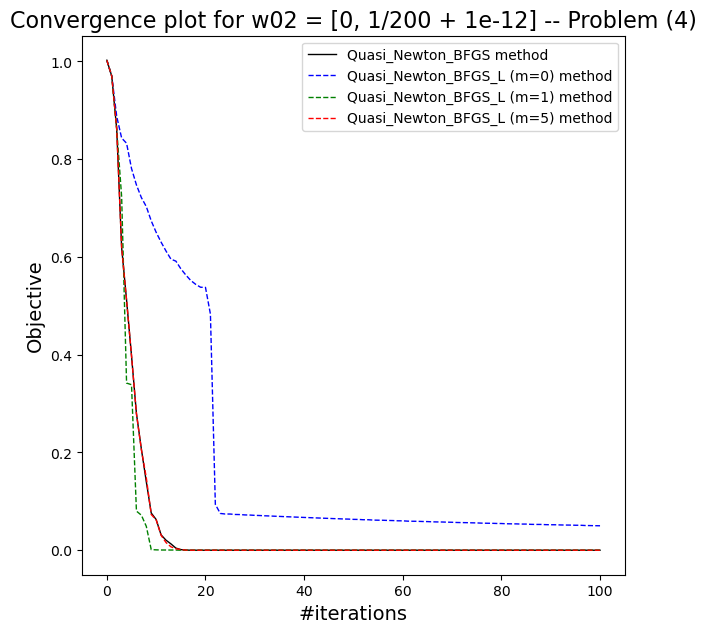

In [158]:
w02 =np.array([0., 1/200 + 1e-12]) 
n_iter=100

resultBFGS, objvalsBFGS = Quasi_Newton_BFGS(w02, rosenbrock, grad_rosenbrock, n_iter=n_iter,theta=0.5,c=0.0001,verbose=False)
resultBFGSL, objvalsBFGSL = Quasi_Newton_L_BFGS(w02, rosenbrock, grad_rosenbrock,m=0 ,n_iter=n_iter,theta=0.5,c=0.0001,verbose=False)
resultBFGSL_1, objvalsBFGSL_1 = Quasi_Newton_L_BFGS(w02, rosenbrock, grad_rosenbrock,m=1 ,n_iter=n_iter,theta=0.5,c=0.0001,verbose=False)
resultBFGSL_5, objvalsBFGSL_5 = Quasi_Newton_L_BFGS(w02, rosenbrock, grad_rosenbrock,m=5 ,n_iter=n_iter,theta=0.5,c=0.0001,verbose=False)

plt.figure(figsize=(7, 7))

plt.plot(objvalsBFGS, label="Quasi_Newton_BFGS method",color = "black" ,lw=1)
plt.plot(objvalsBFGSL, label="Quasi_Newton_BFGS_L (m=0) method",color = "blue", linestyle='dashed',lw=1)
plt.plot(objvalsBFGSL_1, label="Quasi_Newton_BFGS_L (m=1) method",color = "green", linestyle='dashed',lw=1)
plt.plot(objvalsBFGSL_5, label="Quasi_Newton_BFGS_L (m=5) method",color = "red", linestyle='dashed',lw=1)

plt.title("Convergence plot for w02 = [0, 1/200 + 1e-12] -- Problem (4)", fontsize=16)
plt.xlabel("#iterations", fontsize=14)
plt.ylabel("Objective", fontsize=14)
plt.legend()

##### Here we can observe that with increasing m , the  Limited-memory BFGS method becomes similar to the Quasi Nawthon method                                                                       
##### The case where m=0 results in having a Gradient descent behavior
##### To conclude the benefits from  the Limited-memory BFGS method is using less memory

# <span style="color:rgb(234,81,96)"> 2-  Stochastic second-order methods</span>


In [11]:
# Data generation.
# This code is inspired by a generator proposed by A. Gramfort.

def simu_linmodel(w, n, std=1., corr=0.5):
    """
    Simulation values obtained by a linear model with additive noise
    
    Parameters
    ----------
    w : np.ndarray, shape=(d,)
        The coefficients of the model
    
    n : int
        Sample size
    
    std : float, default=1.
        Standard-deviation of the noise

    corr : float, default=0.5
        Correlation of the feature matrix
    """    
    d = w.shape[0]
    cov = toeplitz(corr ** np.arange(0, d))
    X = multivariate_normal(np.zeros(d), cov, size=n)
    noise = std * randn(n)
    y = X.dot(w) + noise
    return X, y



In [12]:
# I modified the class from the lab (I am treating only the case of logistic regression)


class RegPb(object):
    '''
        A class for regression problems with linear models.
        
        Attributes:
            X: Data matrix (features)
            y: Data vector (labels)
            n,d: Dimensions of X
            loss: Loss function (Logistic loss) 
            lbda: Regularization parameter
    '''
   
    # Instantiate the class
    def __init__(self, X, y,lbda=0):
        self.X = X
        self.y = y
        self.n, self.d = X.shape
        self.lbda = lbda
        
    
    # Objective value
    def fun(self, w):
        yXw = self.y * self.X.dot(w)
        return np.mean(np.log(1. + np.exp(-yXw))) + self.lbda * np.linalg.norm(w) ** 2 / 2.
    
    # Partial objective value
    def f_i(self, i, w):
        yXwi = self.y[i] * np.dot(self.X[i], w)
        return np.log(1. + np.exp(- yXwi)) + self.lbda * np.linalg.norm(w) ** 2 / 2.
    
    def f_Sk(self, w, Sk_indices):
        return np.mean([self.f_i(i, w)  for i in Sk_indices], axis=0)

    
    # Full gradient computation
    def grad(self, w):
        yXw = self.y * self.X.dot(w)
        aux = 1. / (1. + np.exp(yXw))
        return - (self.X.T).dot(self.y * aux) / self.n + self.lbda * w
    
    # Partial gradient
    def grad_i(self,i,w):
        x_i = self.X[i]
        grad = - x_i * self.y[i] / (1. + np.exp(self.y[i]* x_i.dot(w)))
        grad += self.lbda * w
        return grad
        
    # Hessian computation
    def hess(self, w):
        yXw = self.y * self.X.dot(w)
        D = np.diag(np.exp(yXw) / (1 + np.exp(yXw))**2)
        return self.X.T.dot(D).dot(self.X) / self.n + self.lbda * np.eye(self.d)
    
    # Partial Hessian for a single data point
    def hess_i(self, i, w):
        x_i = self.X[i]
        yXw_i = self.y[i] *(x_i.T).dot(w)
        D_i = np.exp(yXw_i) / (1 + np.exp(yXw_i))**2
        return D_i * np.outer(x_i,x_i) + self.lbda * np.identity(self.d)

        
    # Lipschitz constant for the gradient
    def lipgrad(self):
        L = 4. * (norm(self.X, ord=2) **2) /(self.n) + self.lbda
        return L
    
    # Lipschitz constant for a subset
    def lipgrad_subset(self, Sk_indices):
        X_Sk = self.X[Sk_indices]
        L_Sk = 4. * (norm(X_Sk, ord=2)**2) / len(Sk_indices) + self.lbda
        return L_Sk

    def get_indices(self, sample_size_Sk):
        return np.random.choice(self.n, sample_size_Sk, replace=False)

    # ''Strong'' convexity constant (could be zero if self.lbda=0)
    def cvxval(self):
        return self.lbda

### Subsampling Newton methods
 
###### Implementation 2.1 

In [13]:
def subsampling_newton(w0, problem, sample_size_Sk, sample_size_SH, n_iter=100,alpha=1,stepchoice='constant',theta=0.5, c=1e-4, verbose=False):
    """

    Inputs:
        w0 : Initial vector.
        problem: Problem structure
            problem.fun() returns the objective function, which is assumed to be a finite sum of functions
            problem.n returns the number of components in the finite sum
            problem.grad_i() returns the gradient of a single component f_i
            problem.hess_i() returns the hessian of a single component f_i
        sample_size_Sk : Size of the subsampled gradient.
        sample_size_SH : Size of the subsampled Hessian.
        n_iter : Number of iterations.
        stepchoice: Strategy for computing the stepsize
            0                   :  Constant stepsize equal to alpha
            'Lipschitz_constant':  stepsize equal to alpha/L
            'Lipschitz_subset'  :  stepsize equal to alpha/L_sk
            'line-search'       :  stepsize computed using  Armijo line search 
        alpha : Initial steplength (only used when stepchoice is not line-search).
        theta : Parameter for subsampling Armijo condition.
        c : Parameter for subsampling Armijo condition.
        verbose: Boolean value indicating whether the outcome of every iteration should be displayed
    Outputs:
        w_output : Final iterate of the method.
        objvals  : History of function values (output as a Numpy array of length n_iter+1)
    """
    # Initializations
    objvals = []  # Objective history
    w = w0.copy()  # Initial value of current iterate
    nw = norm(w)
    n =  problem.n # Number of samples
    
    k = 0  # Initialize iteration counter
    
  
    # Current objective
    obj = problem.fun(w) 
    objvals.append(obj)
    
    # Plot the initial values if asked to
    if verbose:
        print("Subsampling Newton Method, batch size =",sample_size_Sk,"/",n)
        print(' | '.join([name.center(8) for name in ["iter", "fval"]]))
        print(' | '.join([("%d" % k).rjust(8), ("%.2e" % obj).rjust(8)]))
    
    np.random.seed(42)
    # Main loop
    while (k < n_iter and nw < 10**100):
        
        Sk_indices = np.random.choice(n, sample_size_Sk, replace=False)
        SHk_indices = np.random.choice(n, sample_size_SH, replace=False)
        
        grad_f_Sk = np.mean([problem.grad_i(i, w)  for i in Sk_indices], axis=0) # Batch gradient
        hess_f_SHk = np.mean([problem.hess_i(i, w)  for i in SHk_indices], axis=0) # Batch hess
        
        # Compute search direction
        d = -np.linalg.solve(hess_f_SHk, grad_f_Sk)
        
        alpha_k =None
        # Compute step size
        if stepchoice == 0:
            alpha_k = alpha
        elif stepchoice == 'Lipschitz_constant':
            L = problem.lipgrad() # Lipschitz constant
            alpha_k = alpha/L
            
        elif stepchoice =='Lipschitz_subset':
            alpha_k = alpha/problem.lipgrad_subset(Sk_indices)
        
        elif stepchoice == 'line-search':
            # Subsampling Armijo line-search
            alpha_k = 0.5  # Initial step size
            armijo_iter = 0  # Iteration counter for Armijo line search
            while problem.f_Sk(w + alpha_k * d, Sk_indices) > problem.f_Sk(w,Sk_indices) + c * alpha_k * np.dot(d.T, grad_f_Sk):
                alpha_k *= theta
                armijo_iter+=1
                if(armijo_iter==1000):
                    print("break line-search")
                    break;
   
        
        # Perform the update 
        w[:] = w + alpha_k * d
        
        nw = norm(w)
        # Compute new objective value
        obj = problem.fun(w)
        
        # Increment iteration count
        k += 1
        # Plot quantities of interest at the end of every epoch only
        if (k*sample_size_Sk) % n == 0:
            objvals.append(obj)
            if verbose:
                print(' | '.join([("%d" % k).rjust(8), ("%.2e" % obj).rjust(8)]))
     
    # End of main loop
    #################
    
    # Plot quantities of interest for the last iterate (if needed)
    if (k*sample_size_Sk) % n > 0:
        objvals.append(obj)
        if verbose:
            print(' | '.join([("%d" % k).rjust(8), ("%.2e" % obj).rjust(8)]))
    # Outputs
    w_output = w.copy()
    return w_output, np.array(objvals)


######  Using the same (synthetic) dataset , Let's compare the subsampling Newton method with the standard Newton

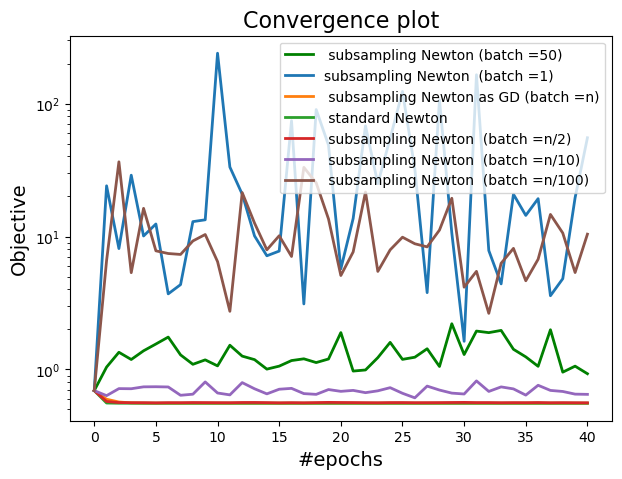

In [164]:
# Using the appropriate version of Armijo line search for each method (use the same c and θ);
# Using different sizes for |Sk| and |SHk|, including the configuration |Sk| = |SHk| = 1.

"""
'Lipschitz_constant':  stepsize equal to alpha/L
'Lipschitz_subset'  :  stepsize equal to alpha/L_sk
'line-search'       :  stepsize computed using  Armijo line search 
"""

nb_epochs = 40
d = 50
n = 1000
idx = np.arange(d)
lbda = 1. / n ** (0.5)

# Fix random seed for reproducibility
np.random.seed(0)
# Ground truth coefficients of the model
w_model_truth = (-1)**idx * np.exp(-idx / 10.)

Xlog, ylog = simu_linmodel(w_model_truth, n, std=1., corr=0.7)
ylog = np.sign(ylog)  # Taking the sign for binary classification
pblogreg = RegPb(Xlog, ylog, lbda)

# Apply the subsampling Newton method to a regression problem
w0 = np.zeros(d)  # Initial vector


alpha = None  # Constant stepsize
theta = 0.5
c=0.0001
stepchoice = "line-search"
 
# Run a  - Stochastic gradient with Armijo line search
w_output_Sub, objvals_SubGD = subsampling_newton(w0, pblogreg, sample_size_Sk=pblogreg.n, sample_size_SH=pblogreg.n, n_iter=int(nb_epochs*pblogreg.n/pblogreg.n), alpha=alpha, stepchoice = stepchoice,theta=theta, c=c, verbose=False)
w_output_S, objvals_Sub_S =   subsampling_newton(w0, pblogreg, sample_size_Sk=1, sample_size_SH=1, n_iter=int(nb_epochs*pblogreg.n), alpha=alpha, stepchoice = stepchoice,theta=theta, c=c, verbose=False)
w_output_Sub, objvals_Sub50 = subsampling_newton(w0, pblogreg, sample_size_Sk=50, sample_size_SH=50, n_iter=int(nb_epochs*pblogreg.n/50), alpha=alpha,stepchoice = stepchoice, theta=theta, c=c, verbose=False)
w_output_Sub, objvals_Sub = subsampling_newton(w0, pblogreg, sample_size_Sk= int(pblogreg.n/2), sample_size_SH=int(pblogreg.n/2), n_iter=int(nb_epochs*2), alpha=alpha, stepchoice = stepchoice,theta=theta, c=c, verbose=False)
w_output_Sub, objvals_Sub10 = subsampling_newton(w0, pblogreg, sample_size_Sk= int(pblogreg.n/10), sample_size_SH=int(pblogreg.n/10), n_iter=int(nb_epochs*10), alpha=alpha,stepchoice = stepchoice, theta=theta, c=c, verbose=False)
w_output_Sub, objvals_Sub100 = subsampling_newton(w0, pblogreg, sample_size_Sk= int(pblogreg.n/100), sample_size_SH=int(pblogreg.n/100), n_iter=int(nb_epochs*100), alpha=alpha, stepchoice = stepchoice, theta=theta, c=c, verbose=False)
w_output, objvals = global_Newton(w0, pblogreg.fun, pblogreg.grad, pblogreg.hess, n_iter=nb_epochs,theta=theta,c=c,verbose=False)



# In terms of objective value (logarithmic scale)
plt.figure(figsize=(7, 5))
plt.semilogy(objvals_Sub50, label=" subsampling Newton (batch =50)",color="green" ,lw=2)
plt.semilogy(objvals_Sub_S ,label="subsampling Newton  (batch =1)", lw=2)
plt.semilogy(objvals_SubGD, label=" subsampling Newton as GD (batch =n)",lw=2)
plt.semilogy(objvals, label=" standard Newton ", lw=2)
plt.semilogy(objvals_Sub, label=" subsampling Newton  (batch =n/2)", lw=2)
plt.semilogy(objvals_Sub10, label=" subsampling Newton  (batch =n/10)", lw=2)
plt.semilogy(objvals_Sub100, label=" subsampling Newton  (batch =n/100)", lw=2)



plt.title("Convergence plot", fontsize=16)
plt.xlabel("#epochs", fontsize=14)
plt.ylabel("Objective", fontsize=14)
plt.legend()

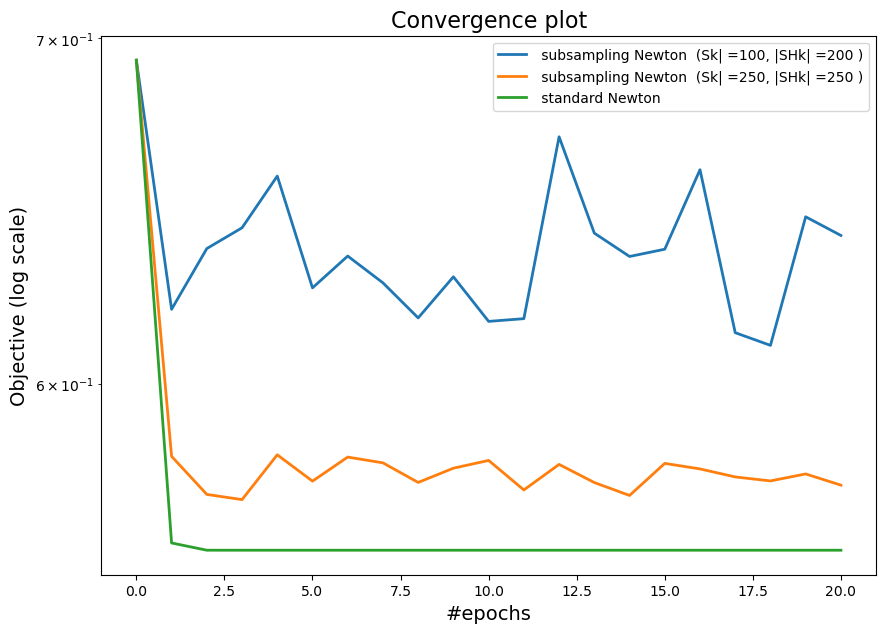

In [165]:
nb_epochs = 20
w0 = np.zeros(d)  
alpha = None  
theta = 0.5
c=0.0001
stepchoice = "line-search"


np.random.seed(0)


batch = 100
_, objvals_100 = subsampling_newton(w0, pblogreg, sample_size_Sk=batch,sample_size_SH=200,  n_iter=int(nb_epochs*pblogreg.n/batch), 
                                             alpha=alpha, stepchoice=stepchoice,theta=theta, c=c, verbose=False)

batch = 250
_, objvals_250 = subsampling_newton(w0, pblogreg, sample_size_Sk=batch,sample_size_SH=batch,  n_iter=int(nb_epochs*pblogreg.n/batch), 
                                            alpha=alpha,stepchoice=stepchoice, theta=theta, c=c, verbose=False)

w_output, objvals = global_Newton(w0, pblogreg.fun, pblogreg.grad, pblogreg.hess, n_iter=nb_epochs,theta=theta,c=c,verbose=False)


plt.figure(figsize=(10, 7))
plt.semilogy(objvals_100, label=" subsampling Newton  (Sk| =100, |SHk| =200 )", lw=2)
plt.semilogy(objvals_250, label=" subsampling Newton  (Sk| =250, |SHk| =250 )", lw=2)
plt.semilogy(objvals, label=" standard Newton ", lw=2)

plt.title("Convergence plot", fontsize=16)
plt.xlabel("#epochs", fontsize=14)
plt.ylabel("Objective (log scale)", fontsize=14)
plt.legend(loc = 'upper right')
    

We can observe that with choosing a bigger batchs ( as we are getting close to GD), the convergence becomes better.

We can also see that this method is not a descent one (with lower batch sizes , the method is diverging)


##### Using constant stepsize ( Lipschitz constant )


In [125]:
# Here we Fix sample sizes for the gradient and Hessian (batch = 50) and we test the Lipschitz 

nb_epochs = 200
w0 = np.zeros(d)  
alpha = 0.01
theta = 0.5
c=1e-4

w_output_F, objvals_F = subsampling_newton(w0, pblogreg, sample_size_Sk=50, sample_size_SH=50, n_iter=int(nb_epochs*pblogreg.n/50), alpha=alpha,stepchoice = 'Lipschitz_constant', theta=theta, c=c, verbose=False)
w_output_F2, objvals_F2 = subsampling_newton(w0, pblogreg, sample_size_Sk=50, sample_size_SH=50, n_iter=int(nb_epochs*pblogreg.n/50), alpha=alpha/2,stepchoice = 'Lipschitz_constant', theta=theta, c=c, verbose=False)


w_output_k, objvals_k = subsampling_newton(w0, pblogreg, sample_size_Sk=50, sample_size_SH=50, n_iter=int(nb_epochs*pblogreg.n/50), alpha=alpha,stepchoice = 'Lipschitz_subset', theta=theta, c=c, verbose=False)
w_output_k2, objvals_k2 = subsampling_newton(w0, pblogreg, sample_size_Sk=50, sample_size_SH=50, n_iter=int(nb_epochs*pblogreg.n/50), alpha=alpha/2,stepchoice = 'Lipschitz_subset', theta=theta, c=c, verbose=False)



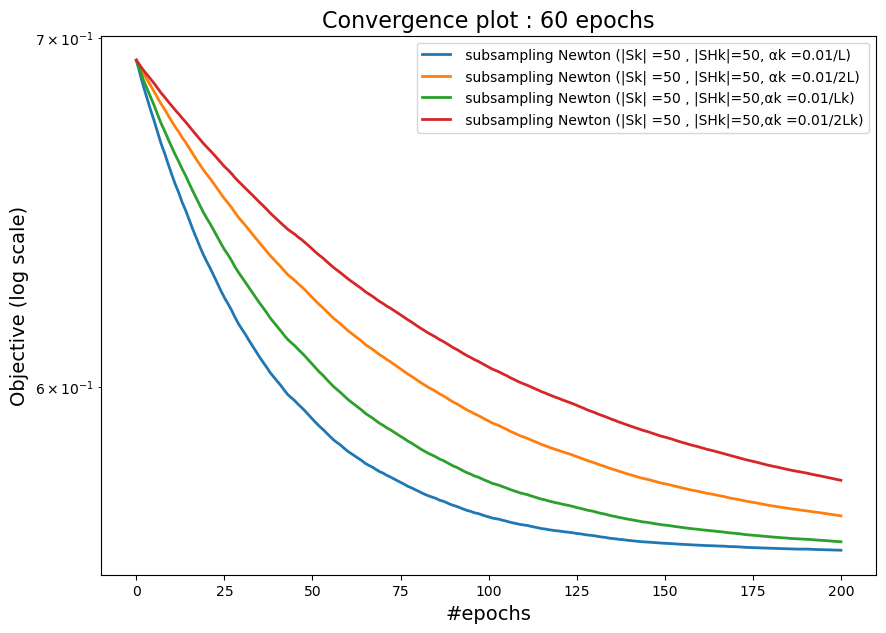

In [126]:
plt.figure(figsize=(10, 7))
plt.semilogy(objvals_F, label=" subsampling Newton (|Sk| =50 , |SHk|=50, αk =0.01/L)" ,lw=2)
plt.semilogy(objvals_F2, label=" subsampling Newton (|Sk| =50 , |SHk|=50, αk =0.01/2L)" ,lw=2)


plt.semilogy(objvals_k, label=" subsampling Newton (|Sk| =50 , |SHk|=50,αk =0.01/Lk)" ,lw=2)
plt.semilogy(objvals_k2, label=" subsampling Newton (|Sk| =50 , |SHk|=50,αk =0.01/2Lk)" ,lw=2)



plt.title("Convergence plot : 60 epochs", fontsize=16)
plt.xlabel("#epochs", fontsize=14)
plt.ylabel("Objective (log scale)", fontsize=14)
plt.legend()

We can observe that for the same alpha factor (here 0.01 and 0.01/2) the Lipschitz constant performs well than the one for the batch.
Moreover with decreasing this alpha factor, the convergence becomes slower




### 2.2 Stochastic quasi-Newton methods


In [14]:
# Implementation 2.2

def stochastic_quasi_newton_bfgs(w0, problem, sample_size_Sk, n_iter=100,alpha=1,stepchoice='constant',theta=0.5, c=1e-4, verbose=False):
    """

    Inputs:
        w0 : Initial vector.
        problem: Problem structure
            problem.fun() returns the objective function, which is assumed to be a finite sum of functions
            problem.n returns the number of components in the finite sum
            problem.grad_i() returns the gradient of a single component f_i
        sample_size_Sk : Size of the subsampled gradient.
        n_iter : Number of iterations.
        stepchoice: Strategy for computing the stepsize
            0                   :  Constant stepsize equal to alpha
            'Lipschitz_constant':  stepsize equal to alpha/L
            'Lipschitz_subset'  :  stepsize equal to alpha/L_sk
            'line-search'       :  stepsize computed using  Armijo line search 
        alpha : Initial steplength (only used when stepchoice is not line-search).
        theta : Parameter for subsampling Armijo condition .
        c : Parameter for subsampling Armijo condition .
        verbose: Boolean value indicating whether the outcome of every iteration should be displayed
    Outputs:
        w_output : Final iterate of the method.
        objvals  : History of function values (output as a Numpy array of length n_iter+1)
    """
    # Initializations
    objvals = []  # Objective history
    w = w0.copy()  # Initial value of current iterate
    nw = norm(w)
    n =  problem.n # Number of samples
    
    k = 0  # Initialize iteration counter
    H = np.identity(len(w)) 
    # Current objective
    obj = problem.fun(w) 
    objvals.append(obj)
    
    # Plot the initial values if asked to
    if verbose:
        print("stochastic_quasi_newton_bfgs, batch size =",sample_size_Sk,"/",n)
        print(' | '.join([name.center(8) for name in ["iter", "fval"]]))
        print(' | '.join([("%d" % k).rjust(8), ("%.2e" % obj).rjust(8)]))
    
    # Main loop
    while (k < n_iter and nw < 10**10):
        
        Sk_indices = np.random.choice(n, sample_size_Sk, replace=False)        
        grad_f_Sk_wk = np.mean([problem.grad_i(i, w)  for i in Sk_indices], axis=0) # Batch gradient
        
        d = -np.dot(H, grad_f_Sk_wk)
        
        alpha_k =None
        # Compute step size
        if stepchoice == 0:
            alpha_k = alpha
        elif stepchoice == 'Lipschitz_constant':
            L = problem.lipgrad() # Lipschitz constant
            alpha_k = alpha/L
            
        elif stepchoice == 'Lipschitz_subset':
            alpha_k = alpha/problem.lipgrad_subset(Sk_indices)
        
        
        elif stepchoice == 'line-search':
            # Subsampling Armijo line-search
            alpha_k = 0.5  # Initial step size
            armijo_iter = 0  # Iteration counter for Armijo line search
            while problem.f_Sk(w + alpha_k * d, Sk_indices) > problem.f_Sk(w,Sk_indices) + c * alpha_k * np.dot(d.T, grad_f_Sk_wk):
                alpha_k *= theta
                armijo_iter+=1
                if(armijo_iter==1000):
                    break;
   
        
        # Update weights
        w_k1 = w + alpha_k * d
        s = w_k1 - w
        grad_f_Sk_wk_1 = np.mean([problem.grad_i(i, w_k1) for i in Sk_indices], axis=0)
        v = grad_f_Sk_wk_1 - grad_f_Sk_wk
        r =s.T@ v
        if r > 0:
            a_ = np.identity(len(w)) - np.outer(v,s)/r
            b_ = np.outer(s,s)/r
            H = a_.T @ H @ a_ + b_
        
        
        w = w_k1.copy()
        nw = norm(w)
        # Compute new objective value
        obj = problem.fun(w_k1)
        #objvals.append(obj) for iteration
        
        # Plot relevant information if asked to
        if verbose:
            print(' | '.join([("%d" % (k+1)).rjust(8), ("%.2e" % obj).rjust(8)]))
        
        
        # Increment iteration count
        k += 1
        # Plot quantities of interest at the end of every epoch only
        if (k*sample_size_Sk) % n == 0:
            objvals.append(obj)
            if verbose:
                print(' | '.join([("%d" % k).rjust(8), ("%.2e" % obj).rjust(8)]))
     
    # End of main loop
    #################
    
    # Plot quantities of interest for the last iterate (if needed)
    if (k*sample_size_Sk) % n > 0:
        objvals.append(obj)
        if verbose:
            print(' | '.join([("%d" % k).rjust(8), ("%.2e" % obj).rjust(8)]))
    # Outputs
    w_output = w.copy()
    return w_output, np.array(objvals)


In [167]:
nb_epochs = 30
np.random.seed(0)
w0 = np.zeros(d) 
alpha = None  
theta = 0.5
c=1e-4
stepchoice = 'line-search'


batch = 1
_, objvals_1 = stochastic_quasi_newton_bfgs(w0, pblogreg, sample_size_Sk=batch, n_iter=int(nb_epochs*pblogreg.n/batch),
                                            alpha=alpha, stepchoice=stepchoice,theta=theta, c=c, verbose=False)

batch = 10
_, objvals_10 = stochastic_quasi_newton_bfgs(w0, pblogreg, sample_size_Sk=batch, n_iter=int(nb_epochs*pblogreg.n/batch),
                                             alpha=alpha, stepchoice=stepchoice,theta=theta, c=c, verbose=False)


batch = 50
_, objvals_50_100 = stochastic_quasi_newton_bfgs(w0, pblogreg, sample_size_Sk=batch,  n_iter=int(nb_epochs*pblogreg.n/batch), 
                                             alpha=alpha, stepchoice=stepchoice,theta=theta, c=c, verbose=False)

batch = 500
_, objvals_500 = stochastic_quasi_newton_bfgs(w0, pblogreg, sample_size_Sk=batch,  n_iter=int(nb_epochs*pblogreg.n/batch), 
                                            alpha=alpha,stepchoice=stepchoice, theta=theta, c=c, verbose=False)

batch = n
_, objvals_n = stochastic_quasi_newton_bfgs(w0, pblogreg, sample_size_Sk=batch,  n_iter=int(nb_epochs*pblogreg.n/batch), 
                                           alpha=alpha, stepchoice=stepchoice,theta=theta, c=c, verbose=False)


resultBFGS, objvalsBFGS = Quasi_Newton_BFGS(w0, pblogreg.fun, pblogreg.grad, n_iter=nb_epochs,theta=theta,c=c,verbose=False)

    

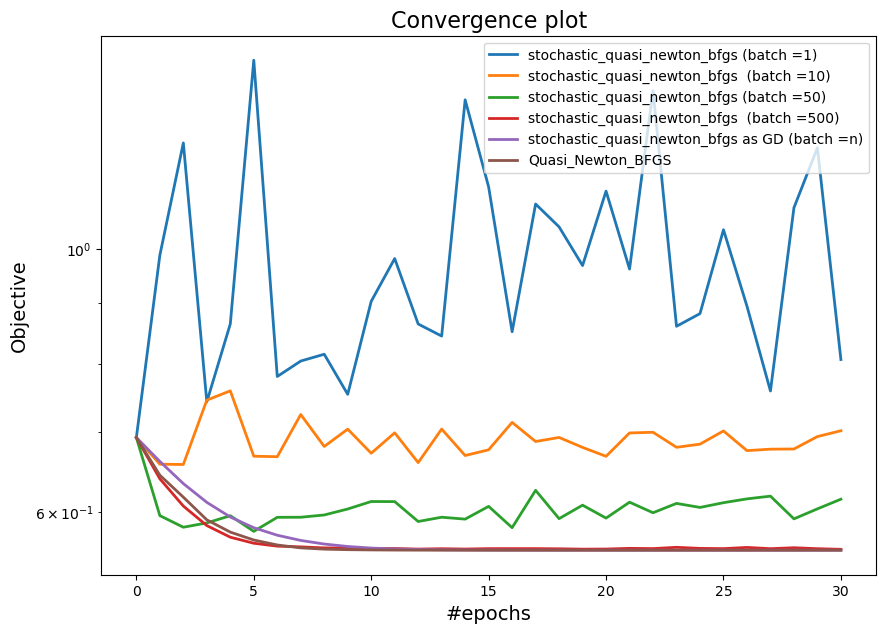

In [168]:
plt.figure(figsize=(10, 7))
plt.semilogy(objvals_1, label="stochastic_quasi_newton_bfgs (batch =1)" ,lw=2)
plt.semilogy(objvals_10 ,label="stochastic_quasi_newton_bfgs  (batch =10)", lw=2)
plt.semilogy(objvals_50_100, label="stochastic_quasi_newton_bfgs (batch =50) ", lw=2)
plt.semilogy(objvals_500, label="stochastic_quasi_newton_bfgs  (batch =500)", lw=2)
plt.semilogy(objvals_n, label="stochastic_quasi_newton_bfgs as GD (batch =n)", lw=2)
plt.semilogy(objvalsBFGS, label="Quasi_Newton_BFGS", lw=2)
plt.title("Convergence plot", fontsize=16)
plt.xlabel("#epochs", fontsize=14)
plt.ylabel("Objective", fontsize=14)
plt.legend(loc = 'upper right')

As the observations we did before:

when the batch size is equal to n (GD) then we have the same behavior as the classic Quasi_Newton_BFGS.
We can also observe the non descent behavior of the method when we choose lower batch sizes (for example when batch = 1)

In [15]:
def stochastic_quasi_newton_L_bfgs(w0, problem, sample_size_Sk,m,n_iter=100,alpha=1,stepchoice='constant',theta=0.5, c=1e-4, verbose=False):
    """

    Inputs:
        w0 : Initial vector.
        problem: Problem structure
            problem.fun() returns the objective function, which is assumed to be a finite sum of functions
            problem.n returns the number of components in the finite sum
            problem.grad_i() returns the gradient of a single component f_i
        sample_size_Sk : Size of the subsampled gradient.
        sample_size_SH : Size of the subsampled Hessian.
        n_iter : Number of iterations.
        stepchoice: Strategy for computing the stepsize
            0                   :  Constant stepsize equal to alpha
            'Lipschitz_constant':  stepsize equal to alpha/L
            'Lipschitz_subset'  :  stepsize equal to alpha/L_sk
            'line-search'       :  stepsize computed using  Armijo line search 
        alpha : Initial steplength (only used when stepchoice is not line-search).
        theta : Parameter for subsampling Armijo condition .
        c : Parameter for subsampling Armijo condition.
        verbose: Boolean value indicating whether the outcome of every iteration should be displayed
    Outputs:
        w_output : Final iterate of the method.
        objvals  : History of function values (output as a Numpy array of length n_iter+1)
    """
    # Initializations
    objvals = []  # Objective history
    w = w0.copy()  # Initial value of current iterate
    nw = norm(w)
    n =  problem.n # Number of samples
    
    H = np.identity(len(w)) 
    s_hist = [] # History of s vectors
    v_hist = [] # History of v vectors
    k = 0  # Initialize iteration counter

    # Current objective
    obj = problem.fun(w) 
    objvals.append(obj)
    
    # Plot the initial values if asked to
    if verbose:
        print("Subsampling Newton Method, batch size =",sample_size_Sk,"/",n)
        print(' | '.join([name.center(8) for name in ["iter", "fval"]]))
        print(' | '.join([("%d" % k).rjust(8), ("%.2e" % obj).rjust(8)]))
    
    # Main loop
    while (k < n_iter and nw < 10**100):
        
        Sk_indices = np.random.choice(n, sample_size_Sk, replace=False)        
        grad_f_Sk_wk = np.mean([problem.grad_i(i, w)  for i in Sk_indices], axis=0) # Batch gradient
        
        d = -H@ grad_f_Sk_wk
        
        alpha_k =None
        # Compute step size
        if stepchoice == 0:
            alpha_k = alpha
        elif stepchoice == 'Lipschitz_constant':
            L = problem.lipgrad() # Lipschitz constant
            alpha_k = alpha/L
            
        elif stepchoice =='Lipschitz_subset':
            alpha_k = alpha/problem.lipgrad_subset(Sk_indices)
        
        elif stepchoice == 'line-search':
            # Subsampling Armijo line-search
            alpha_k = 0.5  # Initial step size
            armijo_iter = 0  # Iteration counter for Armijo line search
            while problem.f_Sk(w + alpha_k * d, Sk_indices) > problem.f_Sk(w,Sk_indices) + c * alpha_k * np.dot(d.T, grad_f_Sk_wk):
                alpha_k *= theta
   
        
        # Update weights
        w_k1 = w + alpha_k * d
        s = w_k1 - w
        grad_f_Sk_wk_1 = np.mean([problem.grad_i(i, w_k1) for i in Sk_indices], axis=0)
        v = grad_f_Sk_wk_1 - grad_f_Sk_wk
        s_hist.append(s)
        v_hist.append(v)
        
        if len(s_hist) > m:
            s_hist.pop(0)
            v_hist.pop(0)
            
        Hk = np.identity(len(w))      
        
        for i in range(len(s_hist)):
            r = s_hist[i].T@v_hist[i]
            if r > 0:
                a_ = np.identity(len(w)) - np.outer(v,s)/r
                b_ = np.outer(s,s)/r
                Hk = a_.T @ H @ a_ + b_
        
        H=Hk
        w = w_k1.copy()
        obj = problem.fun(w)
        #objvals.append(obj) for iteration
        nw = norm(w)

        
        # Plot relevant information if asked to
        if verbose:
            print(' | '.join([("%d" % (k+1)).rjust(8), ("%.2e" % obj).rjust(8)]))
        
        
        # Increment iteration count
        k += 1
        # Plot quantities of interest at the end of every epoch only
        if (k*sample_size_Sk) % n == 0:
            objvals.append(obj)
            if verbose:
                print(' | '.join([("%d" % k).rjust(8), ("%.2e" % obj).rjust(8)]))
     
    # End of main loop
    #################
    
    # Plot quantities of interest for the last iterate (if needed)
    if (k*sample_size_Sk) % n > 0:
        objvals.append(obj)
        if verbose:
            print(' | '.join([("%d" % k).rjust(8), ("%.2e" % obj).rjust(8)]))
    # Outputs
    w_output = w.copy()
    return w_output, np.array(objvals)


In [170]:
nb_epochs = 30
w0 = np.zeros(d)  
alpha = None
theta = 0.5
c=1e-4
stepchoice = 'line-search'
m=5

batch = 1
_, objvals_1 = stochastic_quasi_newton_L_bfgs(w0, pblogreg, sample_size_Sk=batch,m=m,n_iter=int(nb_epochs*pblogreg.n/batch),
                                              alpha=alpha,stepchoice=stepchoice, theta=theta, c=c, verbose=False)


batch = 10
_, objvals_10 = stochastic_quasi_newton_L_bfgs(w0, pblogreg, sample_size_Sk=batch,m=m, n_iter=int(nb_epochs*pblogreg.n/batch), 
                                               alpha=alpha,stepchoice=stepchoice, theta=theta, c=c, verbose=False)

batch = 50
_, objvals_50 = stochastic_quasi_newton_L_bfgs(w0, pblogreg, sample_size_Sk=batch,m=m, n_iter=int(nb_epochs*pblogreg.n/batch),
                                               alpha=alpha,stepchoice=stepchoice, theta=theta, c=c, verbose=False)


batch = 500
_, objvals_500 = stochastic_quasi_newton_L_bfgs(w0, pblogreg, sample_size_Sk=batch,m=m, n_iter=int(nb_epochs*pblogreg.n/batch), 
                                              alpha=alpha,stepchoice=stepchoice, theta=theta, c=c, verbose=False)

batch = n
_, objvals_n = stochastic_quasi_newton_L_bfgs(w0, pblogreg, sample_size_Sk=batch,m=m, n_iter=int(nb_epochs*pblogreg.n/batch), 
                                             alpha=alpha,stepchoice=stepchoice,theta=theta, c=c, verbose=False)
w_output, objvals = Quasi_Newton_L_BFGS(w0, pblogreg.fun, pblogreg.grad,m=m, n_iter=nb_epochs,theta=theta,c=c,verbose=False)


    

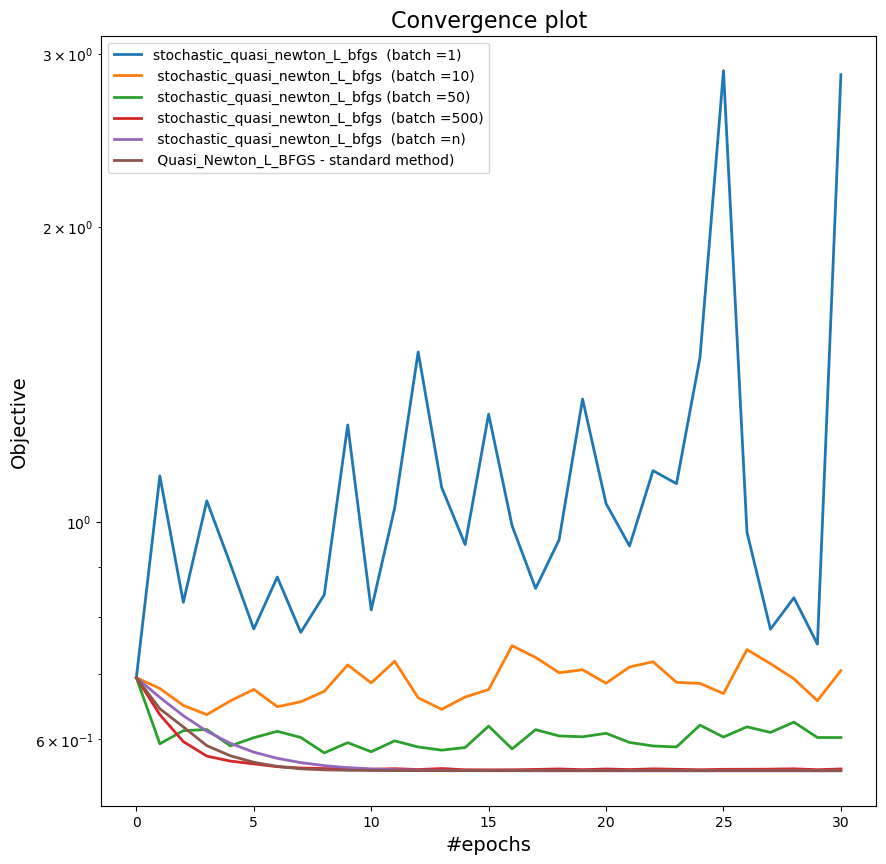

In [171]:
# Plot the comparison of variants of GD/SG with the same stepsize rule

plt.figure(figsize=(10, 10))

plt.semilogy(objvals_1 ,label="stochastic_quasi_newton_L_bfgs  (batch =1)", lw=2)
plt.semilogy(objvals_10, label=" stochastic_quasi_newton_L_bfgs  (batch =10)", lw=2)
plt.semilogy(objvals_50, label=" stochastic_quasi_newton_L_bfgs (batch =50)" ,lw=2)
plt.semilogy(objvals_500, label=" stochastic_quasi_newton_L_bfgs  (batch =500)", lw=2)
plt.semilogy(objvals_n, label=" stochastic_quasi_newton_L_bfgs  (batch =n)", lw=2)
plt.semilogy(objvals, label=" Quasi_Newton_L_BFGS - standard method)", lw=2)



plt.title("Convergence plot", fontsize=16)
plt.xlabel("#epochs", fontsize=14)
plt.ylabel("Objective", fontsize=14)
plt.legend()

The same observation can be seen here

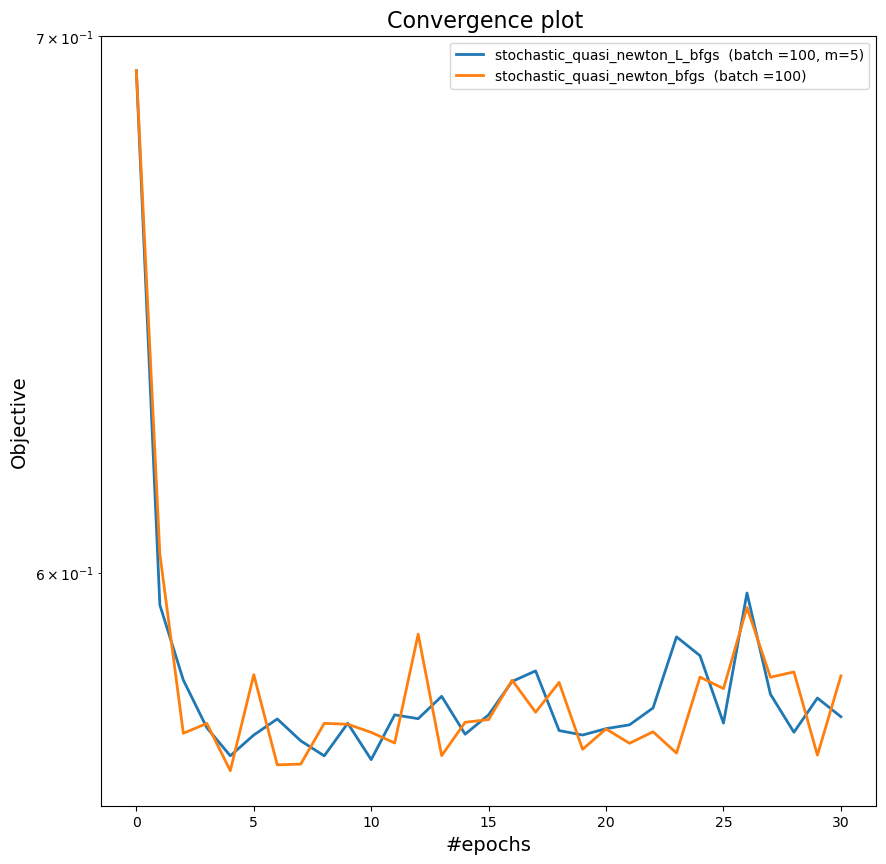

In [172]:
alpha = None
theta = 0.5
c=1e-4
stepchoice = 'line-search'
m=5

batch = 100
_, objvals_LB = stochastic_quasi_newton_L_bfgs(w0, pblogreg, sample_size_Sk=batch,m=m,n_iter=int(nb_epochs*pblogreg.n/batch),
                                              alpha=alpha,stepchoice=stepchoice, theta=theta, c=c, verbose=False)

batch = 100
_, objvals_B = stochastic_quasi_newton_bfgs(w0, pblogreg, sample_size_Sk=batch,  n_iter=int(nb_epochs*pblogreg.n/batch), 
                                             alpha=alpha, stepchoice=stepchoice,theta=theta, c=c, verbose=False)


plt.figure(figsize=(10, 10))

plt.semilogy(objvals_LB ,label="stochastic_quasi_newton_L_bfgs  (batch =100, m=5)", lw=2)
plt.semilogy(objvals_B ,label="stochastic_quasi_newton_bfgs  (batch =100)", lw=2)
plt.title("Convergence plot ", fontsize=16)
plt.xlabel("#epochs", fontsize=14)
plt.ylabel("Objective", fontsize=14)
plt.legend()

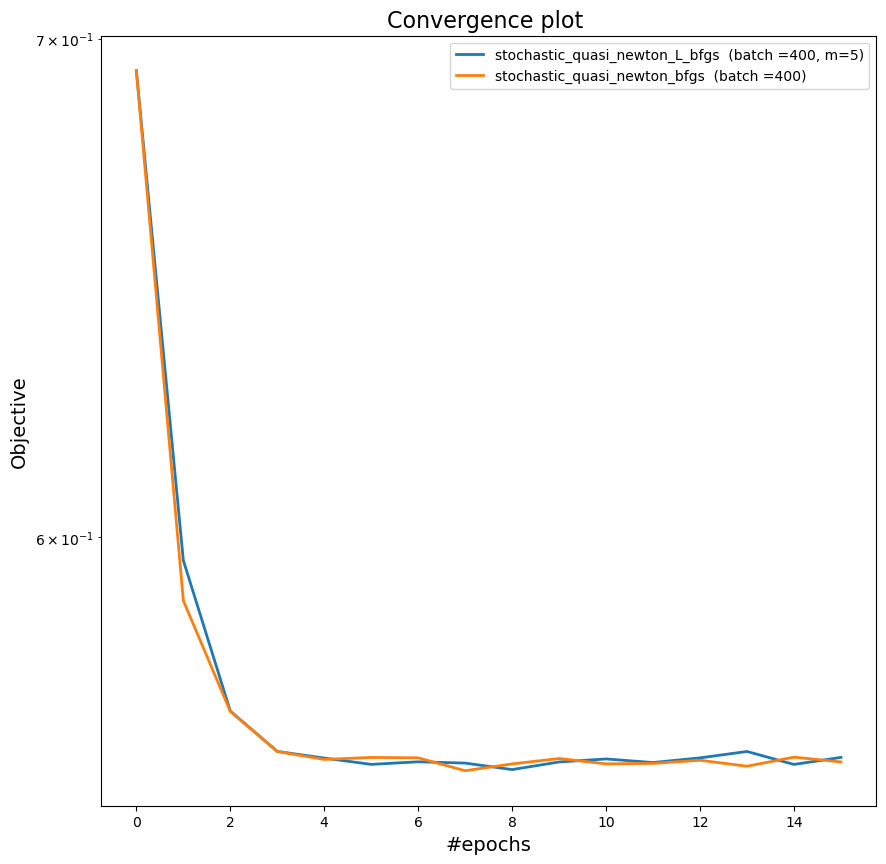

In [173]:
alpha = None
theta = 0.5
c=1e-4
stepchoice = 'line-search'
m=5

batch = 400
_, objvals_LB_400 = stochastic_quasi_newton_L_bfgs(w0, pblogreg, sample_size_Sk=batch,m=m,n_iter=int(nb_epochs*pblogreg.n/batch),
                                              alpha=alpha,stepchoice=stepchoice, theta=theta, c=c, verbose=False)

batch = 400
_, objvals_B_400 = stochastic_quasi_newton_bfgs(w0, pblogreg, sample_size_Sk=batch,  n_iter=int(nb_epochs*pblogreg.n/batch), 
                                             alpha=alpha, stepchoice=stepchoice,theta=theta, c=c, verbose=False)


plt.figure(figsize=(10, 10))
plt.semilogy(objvals_LB_400 ,label="stochastic_quasi_newton_L_bfgs  (batch =400, m=5)", lw=2)
plt.semilogy(objvals_B_400 ,label="stochastic_quasi_newton_bfgs  (batch =400)", lw=2)
plt.title("Convergence plot ", fontsize=16)
plt.xlabel("#epochs", fontsize=14)
plt.ylabel("Objective", fontsize=14)
plt.legend()

# <span style="color:rgb(234,81,96)"> 3-  Binary classification on real-world data</span>


#### 3.1 Dataset

In [27]:
#Implementation 3.2
from sklearn.datasets import load_svmlight_file
X_train, y_train = load_svmlight_file('mushrooms.txt')
y_train-=1 #As y_train ∈ {1, 2} , we will transformit to ∈ {0, 1}

In [28]:
# we take  2,000  samples.
X_train=X_train[:2000]
y_train=y_train[:2000]

#### 3.2  Optimization problem

In [18]:
# Implementation 3.2
from scipy.sparse import issparse, csc_matrix 

class classificationProb:
    def __init__(self, X, y,lbda=0):
        self.X = X
        self.y = y
        self.n, self.d = X.shape
        self.lbda= lbda
    
    # Objective value
    def fun(self, w):
        return np.mean([self.f_i(i, w) for i in range(self.n)],axis=0)
    
    # Partial objective value
    def f_i(self, i, w):
        y_i = self.y[i]
        x_i = self.X[i]
        exp = np.exp(- x_i @w)
        sigmoid = 1 / (1 + exp)
        return (y_i - sigmoid) ** 2 + self.lbda * norm(w) ** 2 / 2.
    
    # Batch objective value
    def f_Sk(self, w, Sk_indices):
        return np.mean([self.f_i(i, w)  for i in Sk_indices], axis=0)
    
    # Partial gradient
    def grad_i(self, i, w):
        y_i = self.y[i]
        x_i = self.X[i]
        exp = np.exp( x_i @w)
        sigmoid = 1 / (1 + exp)
        factor = 2 * exp *( (exp *(y_i - 1) ) + y_i)
        grad = -factor * (sigmoid ** 3) * x_i
        return grad  + self.lbda * w
    
    # Gradient
    def grad(self, w):
        return np.mean([self.grad_i(i, w) for i in range(self.n)], axis=0)
    
    # Batch Gradient
    def grad_Si(self, w, S_indices):
        return np.mean([self.grad_i(i, w) for i in S_indices], axis=0)

    
    # Partial Hessian
    def hess_i(self, i, w):
        y_i = self.y[i]
        x_i = self.X[i]
        if issparse(x_i):
            x_i = x_i.toarray()
        exp = np.exp( x_i @w)
        sigmoid = 1 / (1 + exp)
        factor =  2 * exp * ( (exp**2)*(y_i - 1) +  2*exp - y_i)
        return factor*(sigmoid**4)* np.outer(x_i,x_i) + self.lbda * np.eye(self.d)
    
    # Batch Hessian
    def hess_Si(self, w, S_indices):
        return np.mean([self.hess_i(i, w) for i in S_indices], axis=0)
     
    
    def get_indices(self, sample_size):
        return np.random.choice(self.n, sample_size, replace=False)


In [31]:
# Stochastic gradient implementation
def stoch_grad(w0,problem,stepchoice=0,step0=1, n_iter=1000,nb=1,average=0,with_replace=False,theta=0.5, c=0.0001,verbose=False): 
    """
        A code for gradient descent with various step choices.
        
        Inputs:
            w0: Initial vector
            problem: Problem structure
                problem.fun() returns the objective function, which is assumed to be a finite sum of functions
                problem.n returns the number of components in the finite sum
                problem.grad_i() returns the gradient of a single component f_i
                problem.lipgrad() returns the Lipschitz constant for the gradient
                problem.cvxval() returns the strong convexity constant
            stepchoice: Strategy for computing the stepsize 
                0: Constant step size equal to 1/L
                t>0: Step size decreasing in 1/(k+1)**t
            step0: Initial steplength (only used when stepchoice is not 0)
            n_iter: Number of iterations, used as stopping criterion
            nb: Number of components drawn per iteration/Batch size 
                1: Classical stochastic gradient algorithm (default value)
            average: Indicates whether the method computes the average of the iterates 
                0: No averaging (default)
                1: With averaging
            with_replace: Boolean indicating whether components are drawn with or without replacement
                True: Components drawn with replacement
                False: Components drawn without replacement (Default)
            verbose: Boolean indicating whether information should be plot at every iteration (Default: False)
            
        Outputs:
            w_output: Final iterate of the method (or average if average=1)
            objvals: History of function values (Numpy array of length n_iter at most)
            normits: History of distances between iterates and optimum (Numpy array of length n_iter at most)
    """
    ############
    # Initial step: Compute and plot some initial quantities

    # objective history
    objvals = []
    
    # iterates distance to the minimum history
    normits = []
    
    
    # Number of samples
    n = problem.n
    d=problem.d
    
    # Initial value of current iterate  
    w = w0.copy()
    nw = norm(w)
    
    # Average (if needed)
    if average:
            wavg=np.zeros(len(w))

    # Initialize iteration counter
    k=0
    
    # Current objective
    obj = problem.fun(w) 
    objvals.append(obj);
    
    if verbose:
        # Plot initial quantities of interest
        print("Stochastic Gradient, batch size=",nb,"/",n)
        print(' | '.join([name.center(8) for name in ["iter", "fval"]]))
        print(' | '.join([("%d" % k).rjust(8),("%.2e" % obj).rjust(8)]))
    
    ################
    # Main loop
    while (k < n_iter and nw < 10**100):
        # Draw the batch indices
        ik = np.random.choice(n,nb,replace=with_replace)# Batch gradient
        # Stochastic gradient calculation
        sg = np.zeros(d)
        for j in range(nb):
            gi = problem.grad_i(ik[j],w)
            sg = sg + gi
        sg = (1/nb)*sg
            
        if stepchoice=="line-search":
            alpha_k = 0.5
            #armijo_iter = 0  # Iteration counter for Armijo line search
            while problem.f_Sk(w + alpha_k * (-sg), ik) > problem.f_Sk(w,ik) + c * alpha_k * np.dot(-sg.T, sg):
                alpha_k *= theta
            w[:] = w + alpha_k * (-sg)
            
        elif stepchoice=="Lipschitz_constant":
            L = problem.lipgrad()
            w[:] = w - (step0/L) * sg
        
        elif stepchoice==0:
            w[:] = w - (step0) * sg
        elif stepchoice>0:
            sk = float(step0/((k+1)**stepchoice))
            w[:] = w - sk * sg
        
            
        
        nw = norm(w) #Computing the norm to measure divergence 

        if average:
            # If average, compute the average of the iterates
            wavg = k/(k+1) *wavg + w/(k+1) 
            obj = problem.fun(wavg)
        else:
            obj = problem.fun(w)
        
       
        
        k += 1
        # Plot quantities of interest at the end of every epoch only
        if (k*nb) % n == 0:
            objvals.append(obj)
            if verbose:
                print(' | '.join([("%d" % k).rjust(8),("%.2e" % obj).rjust(8)]))       
    
    # End of main loop
    #################
    
    # Plot quantities of interest for the last iterate (if needed)
    if (k*nb) % n > 0:
        objvals.append(obj)
        if verbose:
            print(' | '.join([("%d" % k).rjust(8),("%.2e" % obj).rjust(8)]))              
    
    # Outputs
    w_output = w.copy()
    
    return w_output, np.array(objvals)

##### We use here Linesearch

In [25]:
lbda = 1. / (X_train.shape[0]) ** (0.5)
optim_problem = classificationProb(X_train, y_train,lbda)

nb_epochs = 30
alpha = None  
theta = 0.5
c=0.0001
stepchoice = "line-search"
m=5
w0 = np.zeros(optim_problem.d)
np.random.seed(0)




batch = 50


_, objvals_50 = subsampling_newton(w0, optim_problem, sample_size_Sk=batch,sample_size_SH=batch,  n_iter=int(nb_epochs*optim_problem.n/batch), 
                                           alpha=alpha, stepchoice=stepchoice,theta=theta, c=c, verbose=False)



w_output, objvals_bfgs = stochastic_quasi_newton_bfgs(w0, optim_problem, sample_size_Sk=batch, n_iter=int(nb_epochs*optim_problem.n/batch), 
                                               alpha=alpha, stepchoice=stepchoice,theta=theta, c=c, verbose=False)

w_output, objvals_L_bfgs = stochastic_quasi_newton_L_bfgs(w0, optim_problem, sample_size_Sk=batch,m=m, n_iter=int(nb_epochs*optim_problem.n/batch), 
                                             alpha=alpha,stepchoice=stepchoice,theta=theta, c=c, verbose=False)


w_a, obj_a = stoch_grad(w0,optim_problem,stepchoice=stepchoice,step0=1, n_iter=int(nb_epochs*optim_problem.n/batch),nb=batch,theta=theta, c=c)



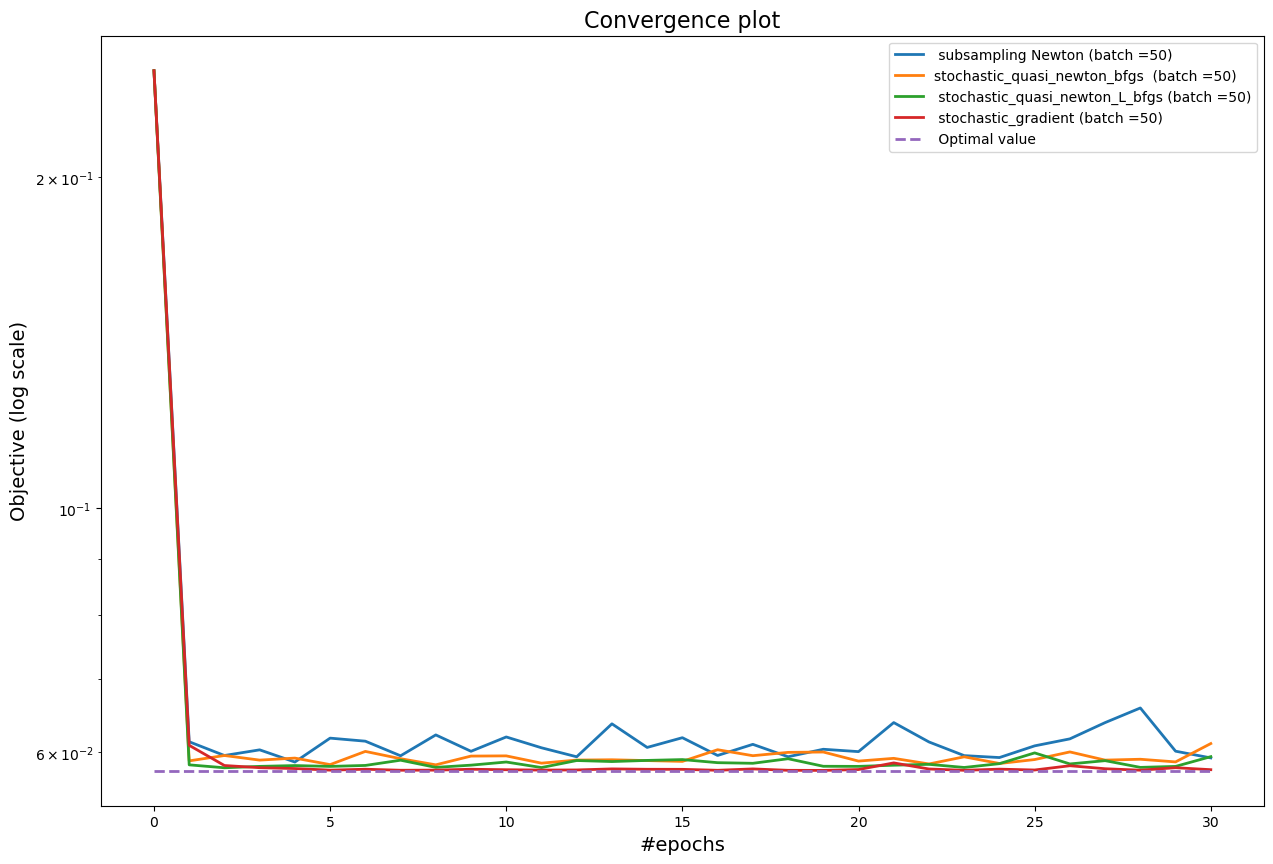

In [157]:
plt.figure(figsize=(15, 10))
plt.semilogy(objvals_50, label=" subsampling Newton (batch =50)", lw=2)
plt.semilogy(objvals_bfgs ,label="stochastic_quasi_newton_bfgs  (batch =50)", lw=2)
plt.semilogy(objvals_L_bfgs, label=" stochastic_quasi_newton_L_bfgs (batch =50)",lw=2)
plt.semilogy(obj_a, label=" stochastic_gradient (batch =50)",lw=2)

plt.title("Convergence plot", fontsize=16)
plt.xlabel("#epochs", fontsize=14)
plt.ylabel("Objective (log scale)", fontsize=14)
plt.legend(loc = 'upper right')

##### Using Constant stepsize

In [32]:
"""
'Lipschitz_constant':  stepsize equal to alpha/L
'Lipschitz_subset'  :  stepsize equal to alpha/L_sk
'line-search'       :  stepsize computed using  Armijo line search 
"""

nb_epochs = 30
np.random.seed(0)
alpha = 0.01  
theta = 0.5
c=0.0001
stepchoice = 0  # for constant stepsize
m=5


batch = 50

_, objvals_50_2 = subsampling_newton(w0, optim_problem, sample_size_Sk=batch,sample_size_SH=batch,  n_iter=int(nb_epochs*optim_problem.n/batch), 
                                           alpha=alpha, stepchoice=stepchoice,theta=theta, c=c, verbose=False)


w_output, objvals_bfgs2 = stochastic_quasi_newton_bfgs(w0, optim_problem, sample_size_Sk=batch, n_iter=int(nb_epochs*optim_problem.n/batch), 
                                               alpha=alpha, stepchoice=stepchoice,theta=theta, c=c, verbose=False)

w_output, objvals_L_bfgs2 = stochastic_quasi_newton_L_bfgs(w0, optim_problem, sample_size_Sk=batch,m=m, n_iter=int(nb_epochs*optim_problem.n/batch), 
                                             alpha=alpha,stepchoice=stepchoice,theta=theta, c=c, verbose=False)


w_a, obj_a2 = stoch_grad(w0,optim_problem,stepchoice=stepchoice,step0=alpha, n_iter=int(nb_epochs*optim_problem.n/batch),nb=batch,theta=theta, c=c)


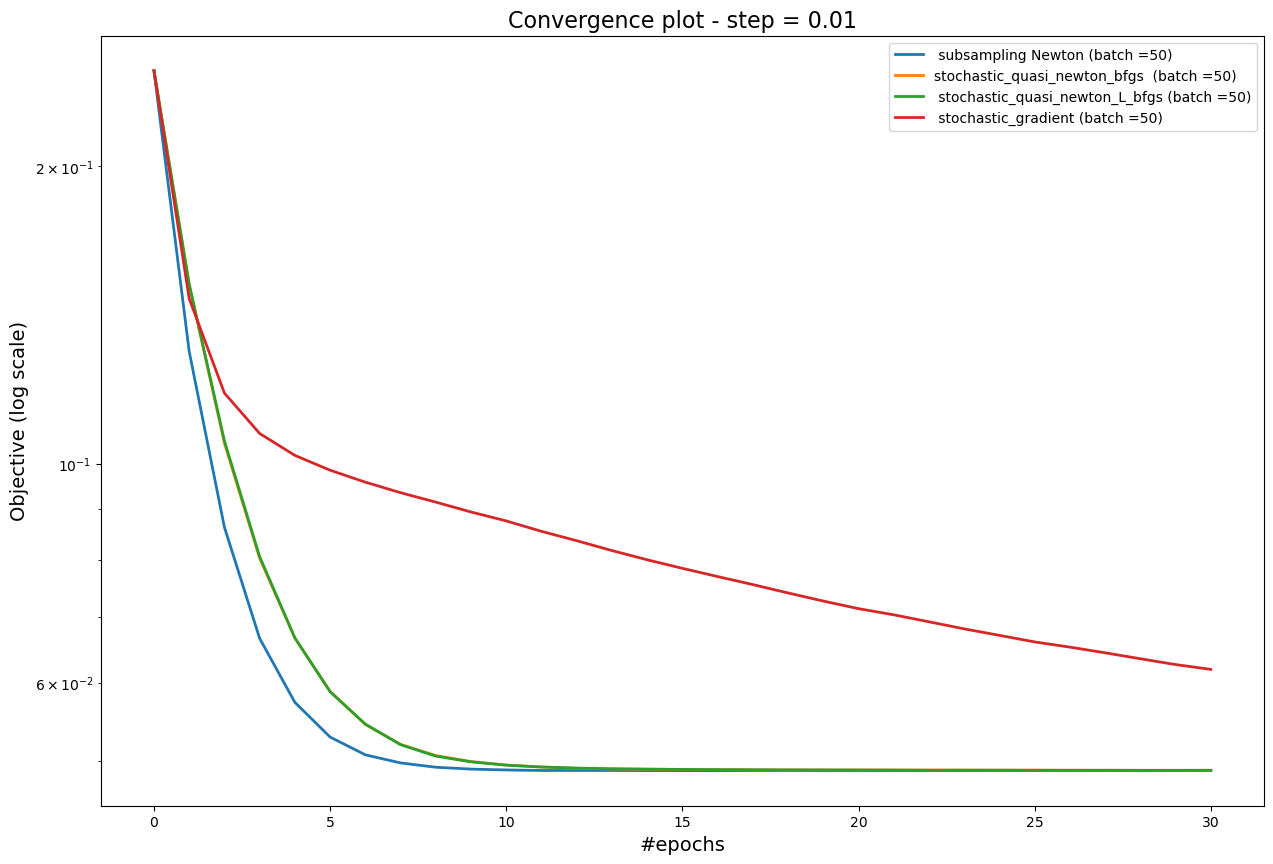

In [33]:
plt.figure(figsize=(15, 10))
plt.semilogy(objvals_50_2, label=" subsampling Newton (batch =50)", lw=2)
plt.semilogy(objvals_bfgs2 ,label="stochastic_quasi_newton_bfgs  (batch =50)", lw=2)
plt.semilogy(objvals_L_bfgs2, label=" stochastic_quasi_newton_L_bfgs (batch =50)",lw=2)
plt.semilogy(obj_a2, label=" stochastic_gradient (batch =50)",lw=2)

plt.title("Convergence plot - step = 0.01", fontsize=16)
plt.xlabel("#epochs", fontsize=14)
plt.ylabel("Objective (log scale)", fontsize=14)
plt.legend(loc = 'upper right')

#### When choosing a constant stepsize, we can observe clearly that the subsampling newton method is the better one for the convergence while the stochasic gradient is the worse in this example. This can be explained by the fact that the stochastic gradient does take into account only gradient information which results in its slow convergence.